# Q1 Project Notebook

In [74]:
#imports
import pandas as pd
import networkx
import geopandas as gpd
from shapely import wkt
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
from shapely import wkt
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import branca.colormap as cm

In [2]:
#load in datasets
wind_data = pd.read_excel('src_wings_meteorology_windspeed_snapshot_2023_08_02.xlsx')
alert_data = pd.read_excel('src_wings_meteorology_station_summary_snapshot_2023_08_02.xlsx')
station_data = pd.read_excel('gis_weatherstation_shape_2024_10_04.xlsx')
conductor_data = pd.read_csv('dev_wings_agg_span_2024_01_01.csv')
vri_data = pd.read_csv('src_vri_snapshot_2024_03_20.csv')

C:\Users\William\AppData\Local\Temp\ipykernel_18968\2433052491.py:5: DtypeWarning: Columns (3,4,5,6,8,10,11,12,14,16,17,20,21,22,23,24,25,34,35,36,37,38,42,44,45,65,66,67,68,69,71,72,82,83,84,87,88,91,92,94,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  conductor_data = pd.read_csv('dev_wings_agg_span_2024_01_01.csv')


# Task 1 EDA and Merging of Wind, Alert, Station Data

In [3]:
#drop duplicates in wind_data
cleaned_station_data = station_data.drop_duplicates(subset=['weatherstationcode'], keep='first')

In [4]:
alert_data

,station,vri,alert,max_gust,99th,95th,snapshot_date
0,AMO,H,35,40,32,24,2023-08-02
1,ANE,M,35,43,32,25,2023-08-02
2,ARH,L,40,46,40,31,2023-08-02
3,AVO,H,35,43,29,24,2023-08-02
4,AVY,L,45,62,53,40,2023-08-02
...,...,...,...,...,...,...,...
211,WST,M,45,51,45,39,2023-08-02
212,WSY,L,45,75,55,43,2023-08-02
213,WWY,M,45,59,46,37,2023-08-02
214,WYN,M,45,54,46,41,2023-08-02


## Merging Datasets

In [5]:
#first merge station data and alert_data to get the alert data for each station
station_alert_data = pd.merge(cleaned_station_data,alert_data[['station','vri','alert']], left_on = 'weatherstationcode', right_on = 'station').drop('station',axis = 1)

In [6]:
wind_station_alert_data = pd.merge(wind_data, station_alert_data, 
                     left_on='station', 
                     right_on='weatherstationcode', 
                     how='left')

wind_station_alert_data

,date,wind_speed,station,snapshot_date_x,objectid,weatherstationcode,weatherstationname,scadartuid,structureid,nwszone,...,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date_y,vri,alert
0,2012-09-14,19.0,AMO,2023-08-02,8.0,AMO,Ammo Dump,1922.0,P28656,Inland Valley-250,...,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,2024-10-04,H,35.0
1,2012-09-15,20.0,AMO,2023-08-02,8.0,AMO,Ammo Dump,1922.0,P28656,Inland Valley-250,...,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,2024-10-04,H,35.0
2,2012-10-14,16.0,AMO,2023-08-02,8.0,AMO,Ammo Dump,1922.0,P28656,Inland Valley-250,...,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,2024-10-04,H,35.0
3,2012-10-26,23.0,AMO,2023-08-02,8.0,AMO,Ammo Dump,1922.0,P28656,Inland Valley-250,...,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,2024-10-04,H,35.0
4,2012-10-27,15.0,AMO,2023-08-02,8.0,AMO,Ammo Dump,1922.0,P28656,Inland Valley-250,...,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,2024-10-04,H,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38659,2022-11-24,36.0,YSA,2023-08-02,64.0,YSA,Santa Ysabel North,1908.0,Z214383,Mountain-258,...,3.0,N,Y,NaN,{7CE455DC-194A-4A02-BFCE-58D5218C9FE0},POINT (1740909.08905 12020580.7369),4431.0,2024-10-04,L,42.0
38660,2022-11-25,36.0,YSA,2023-08-02,64.0,YSA,Santa Ysabel North,1908.0,Z214383,Mountain-258,...,3.0,N,Y,NaN,{7CE455DC-194A-4A02-BFCE-58D5218C9FE0},POINT (1740909.08905 12020580.7369),4431.0,2024-10-04,L,42.0
38661,2022-12-21,18.0,YSA,2023-08-02,64.0,YSA,Santa Ysabel North,1908.0,Z214383,Mountain-258,...,3.0,N,Y,NaN,{7CE455DC-194A-4A02-BFCE-58D5218C9FE0},POINT (1740909.08905 12020580.7369),4431.0,2024-10-04,L,42.0
38662,2022-12-24,31.0,YSA,2023-08-02,64.0,YSA,Santa Ysabel North,1908.0,Z214383,Mountain-258,...,3.0,N,Y,NaN,{7CE455DC-194A-4A02-BFCE-58D5218C9FE0},POINT (1740909.08905 12020580.7369),4431.0,2024-10-04,L,42.0


## EDA

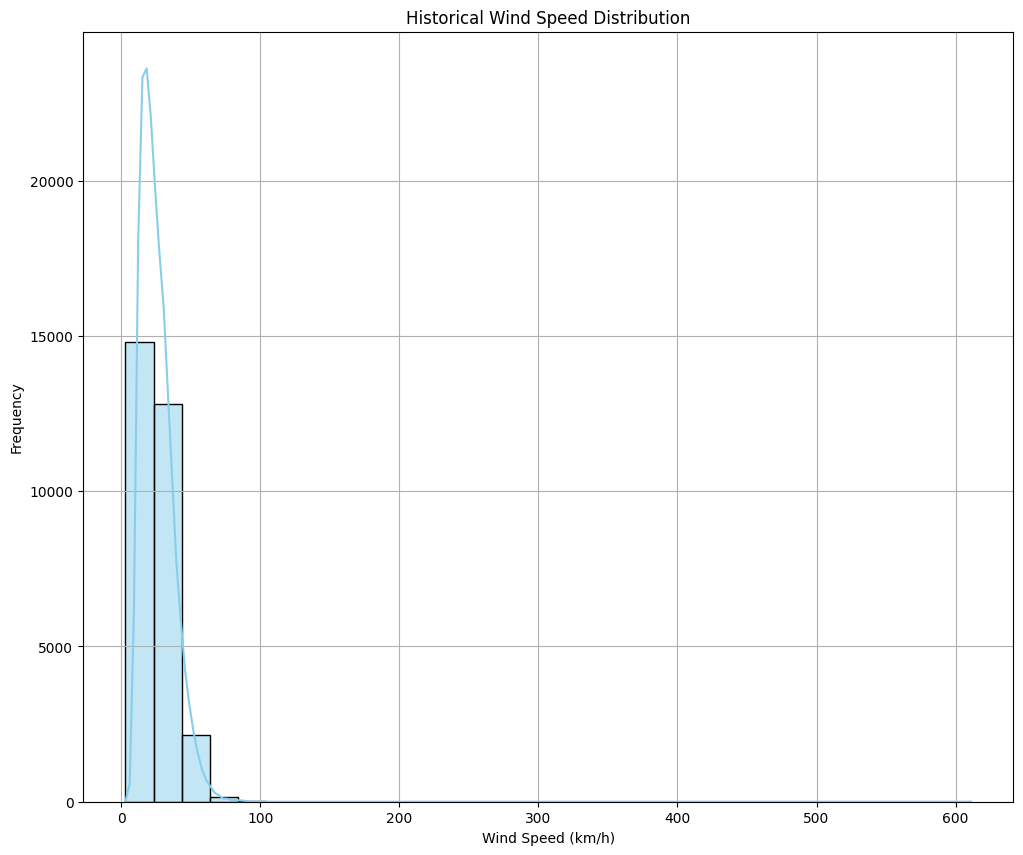

In [7]:
# Historical Wind Speed Distribution
plt.figure(figsize=(12,10))
sns.histplot(data=wind_station_alert_data, x='wind_speed', kde=True, bins=30, color='skyblue')
plt.title('Historical Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

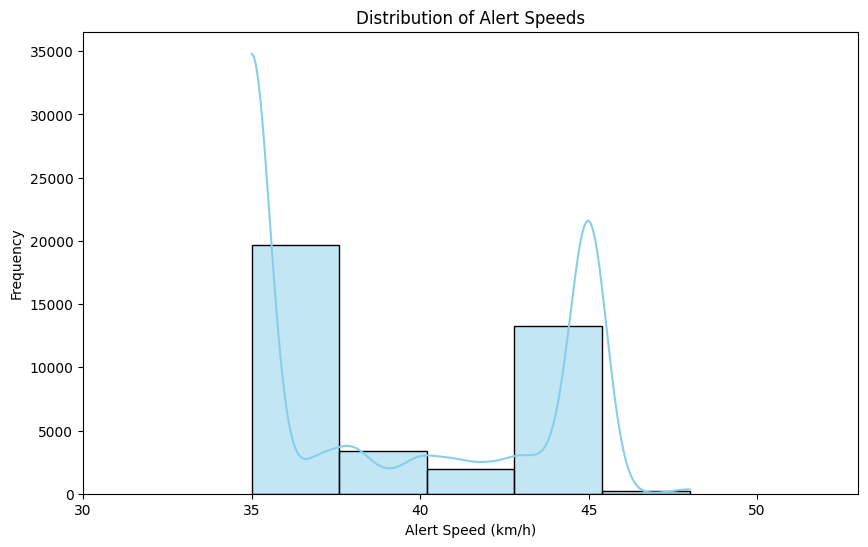

In [8]:
#Distribution of Alert Speeds
plt.figure(figsize=(10, 6))
sns.histplot(data=wind_station_alert_data, x='alert', bins=5, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Alert Speeds')
plt.xlabel('Alert Speed (km/h)')
plt.ylabel('Frequency')

# Adjust x-axis to show only the range of alert speeds
plt.xlim(wind_station_alert_data['alert'].min() - 5, wind_station_alert_data['alert'].max() + 5)

# Display the histogram
plt.show()

# Task 2 Calculating PSPS Probability of Weather Stations and displaying results
- 1. Calculating PSPS Probability for each Weather Station 
- 2. Visualizing Weather Station wind speed distributions against its wind speed threshold, and displaying its calculated PSPS Probability

In [9]:
weather_station_psps_prob_data = (
    wind_station_alert_data.assign(exceeds_alert=lambda x: (x['wind_speed'] > x['alert']))  # Create a boolean column
      .groupby('weatherstationcode')
      .agg(total_records=('exceeds_alert', 'size'),  # Total records per station
           exceeds_count=('exceeds_alert', 'sum'))   # Count where wind_speed > alert
      .assign(percentage_of_PSPS_shutdown=lambda  x: (x['exceeds_count'] / x['total_records']))
      [['percentage_of_PSPS_shutdown']]  # Select only the relevant column
)

weather_station_psps_prob_data.sort_values(by = 'percentage_of_PSPS_shutdown', ascending = False)

,percentage_of_PSPS_shutdown
weatherstationcode,
SIL,0.843575
CWD,0.435754
STT,0.424581
HHC,0.402235
BOC,0.379888
...,...
DLH,0.000000
DLR,0.000000
HAR,0.000000


In [10]:
merged_df = pd.merge(wind_station_alert_data, weather_station_psps_prob_data, on='weatherstationcode')

In [11]:
grouped = merged_df.groupby('station')

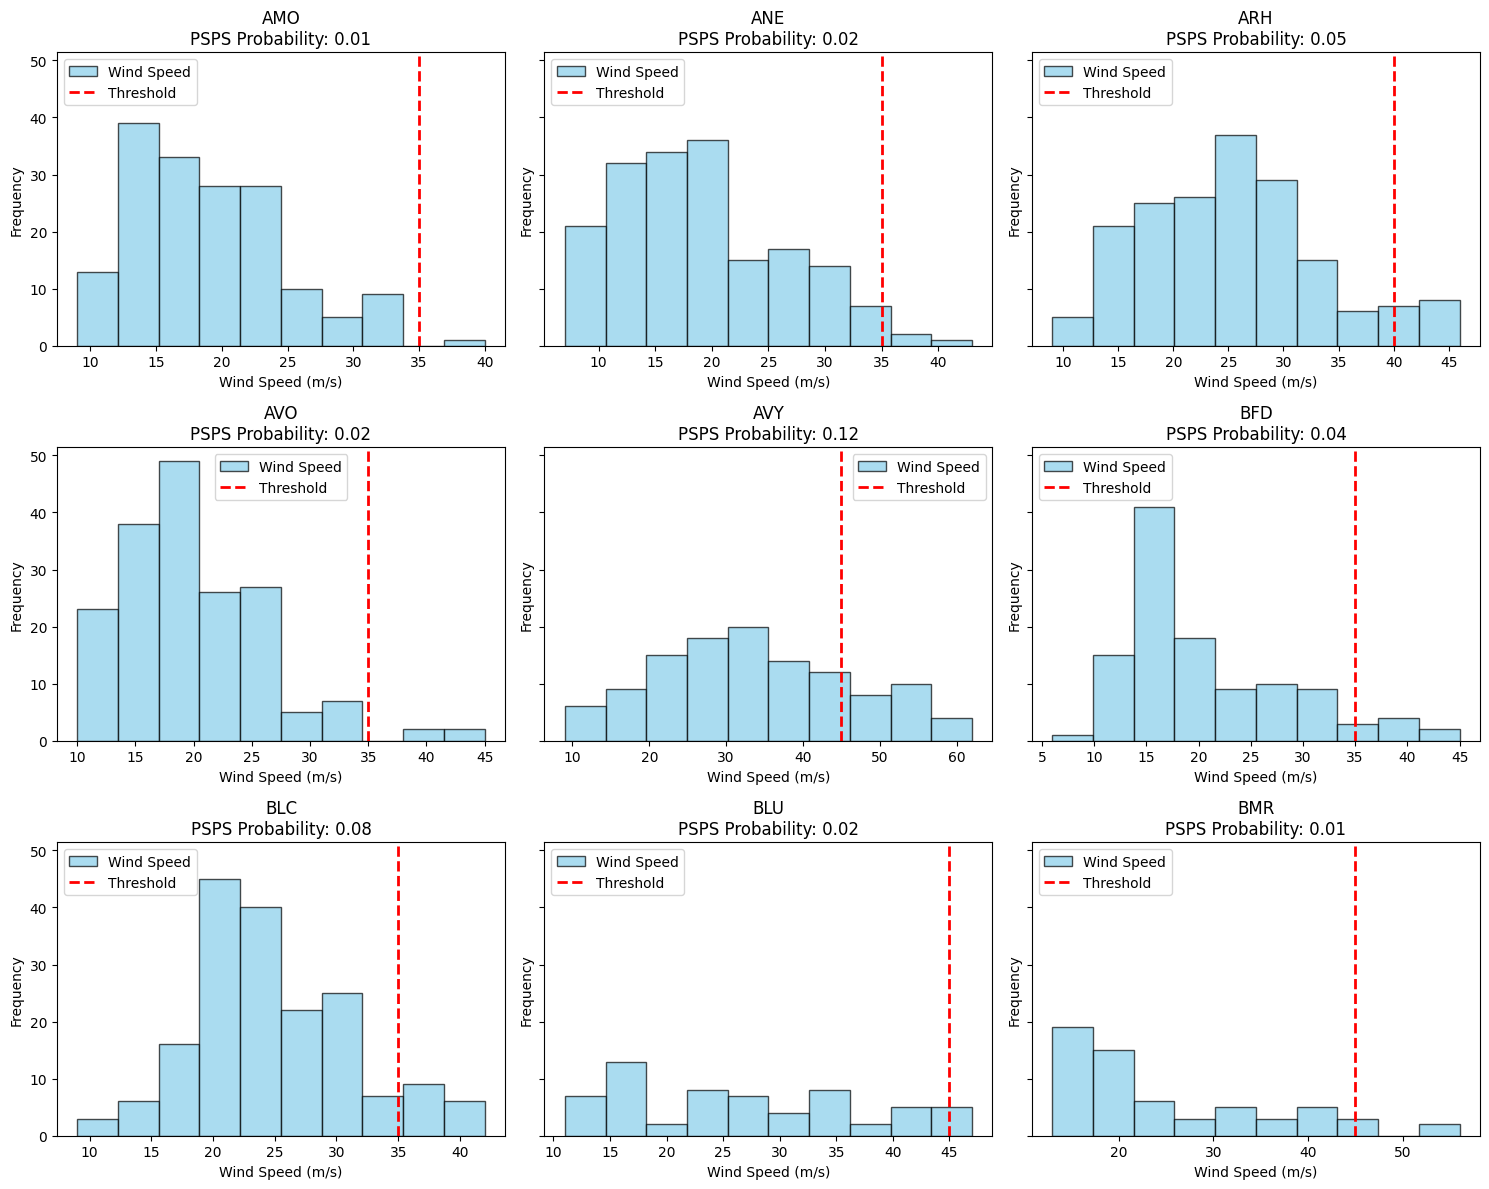

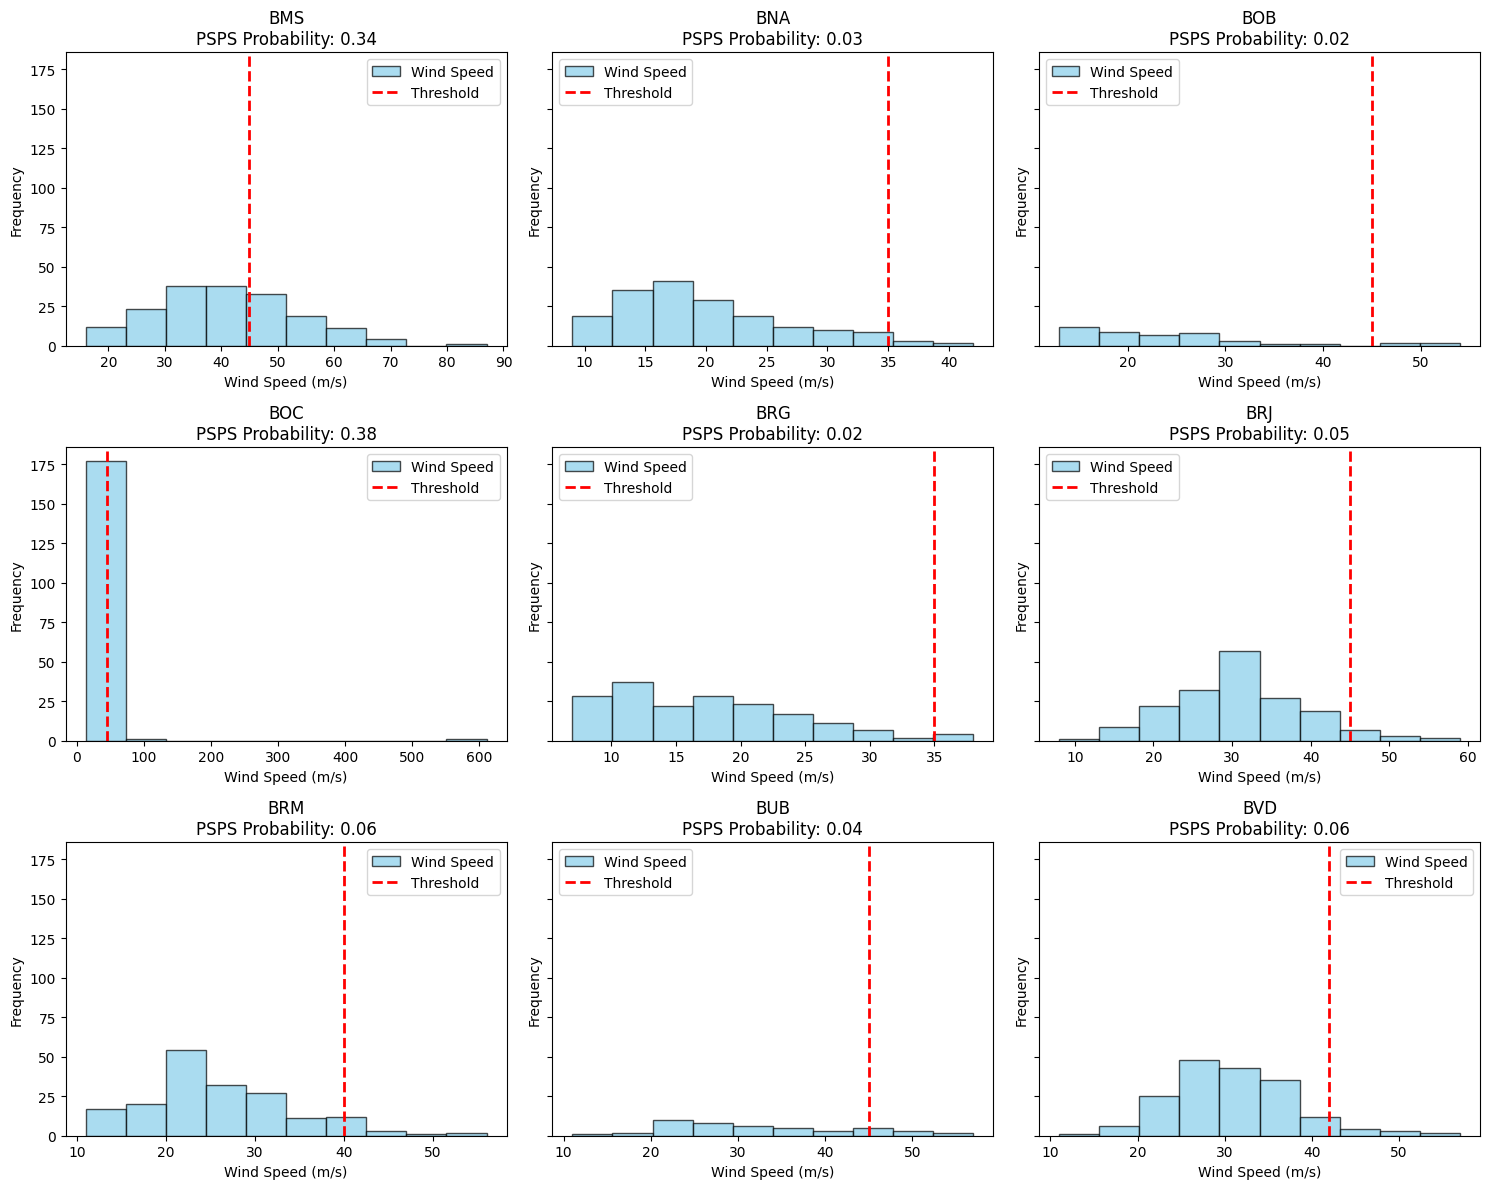

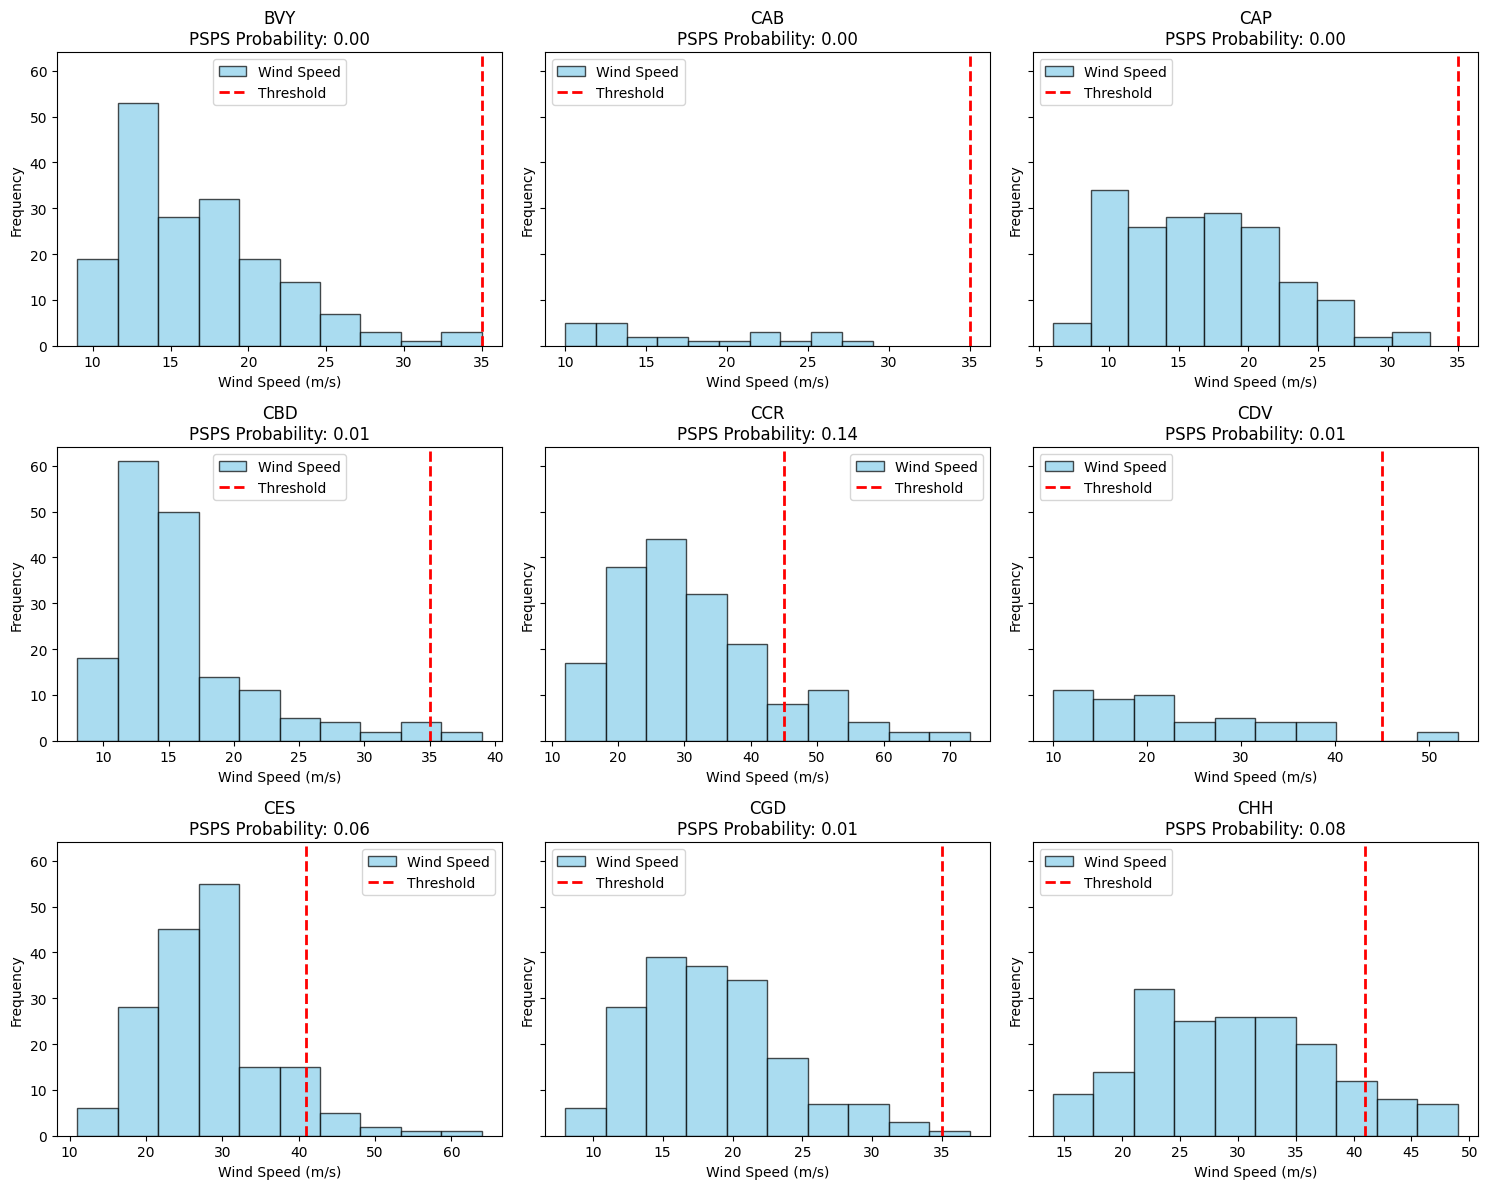

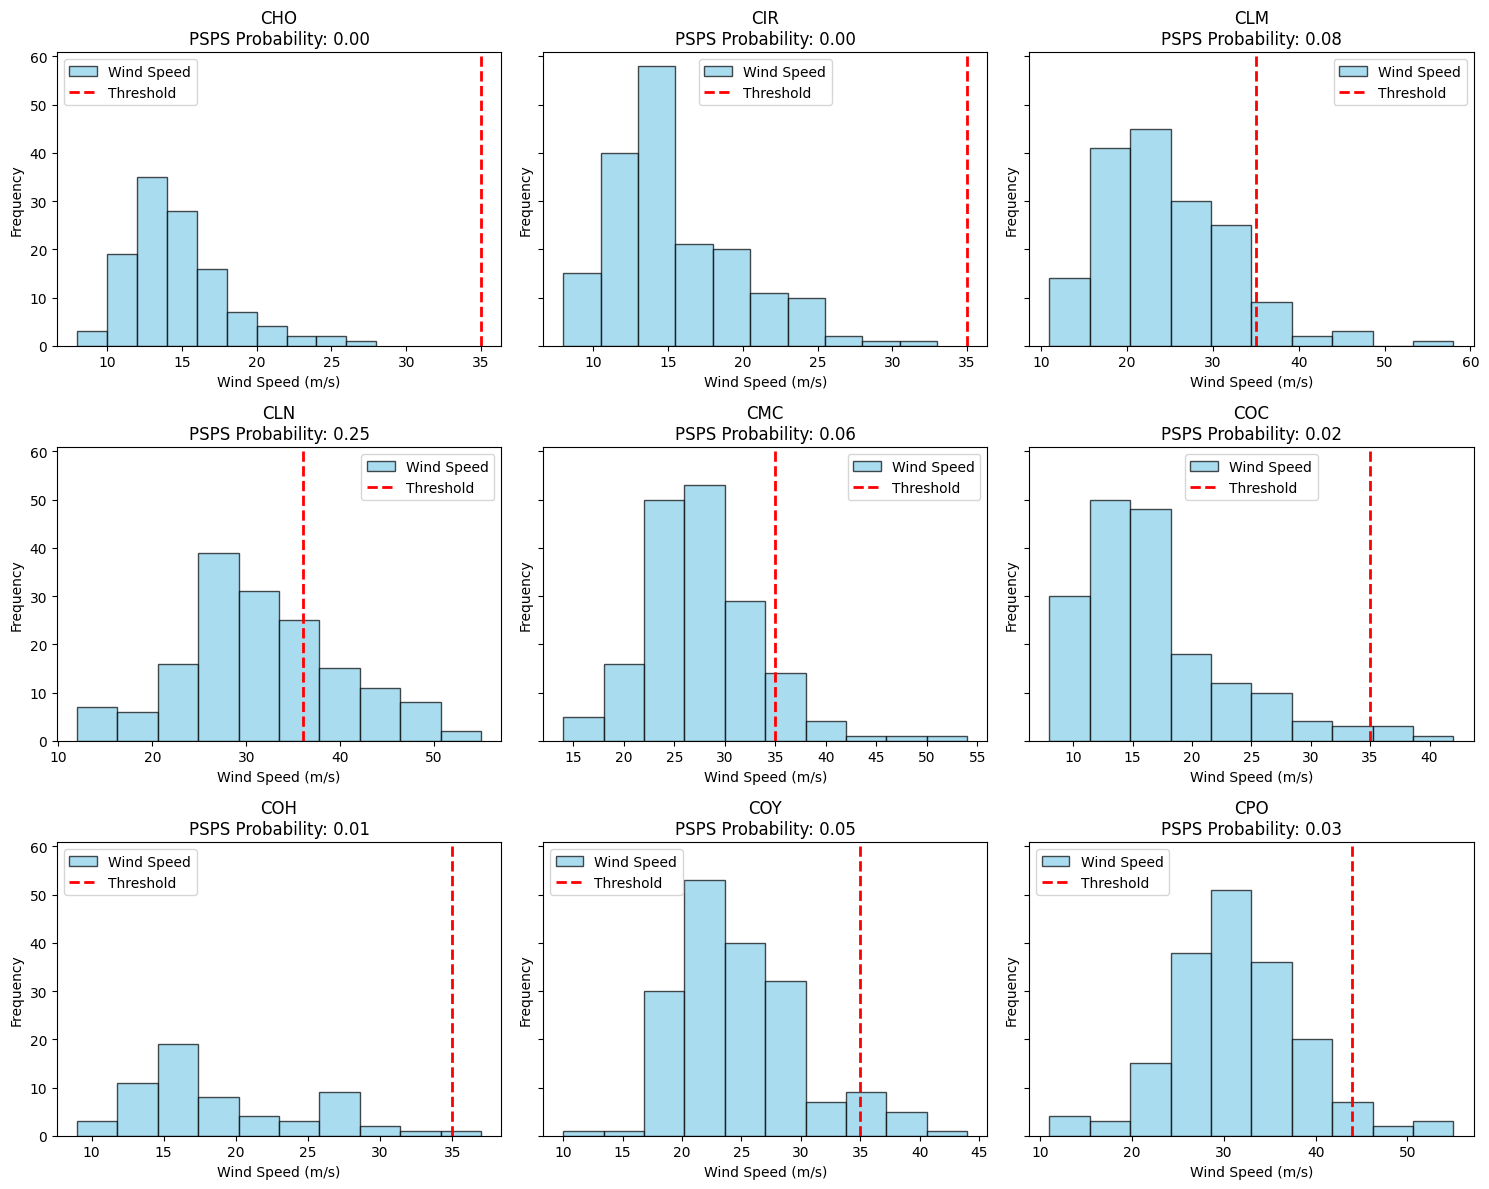

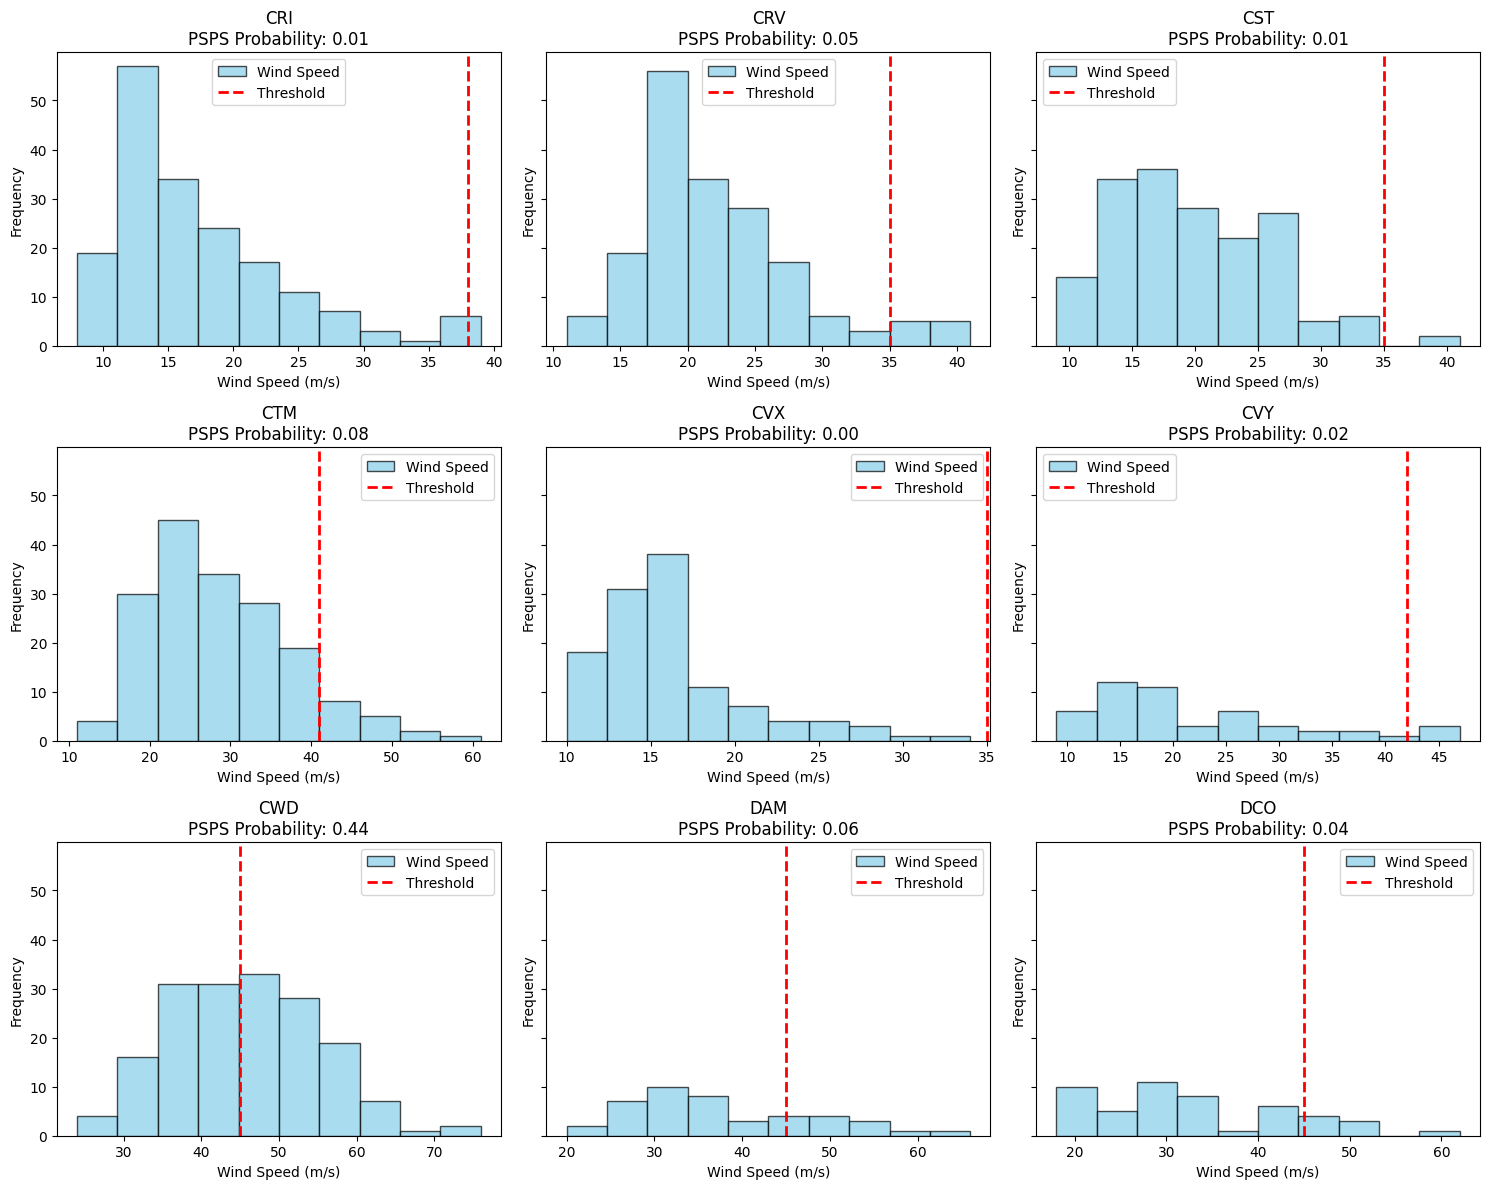

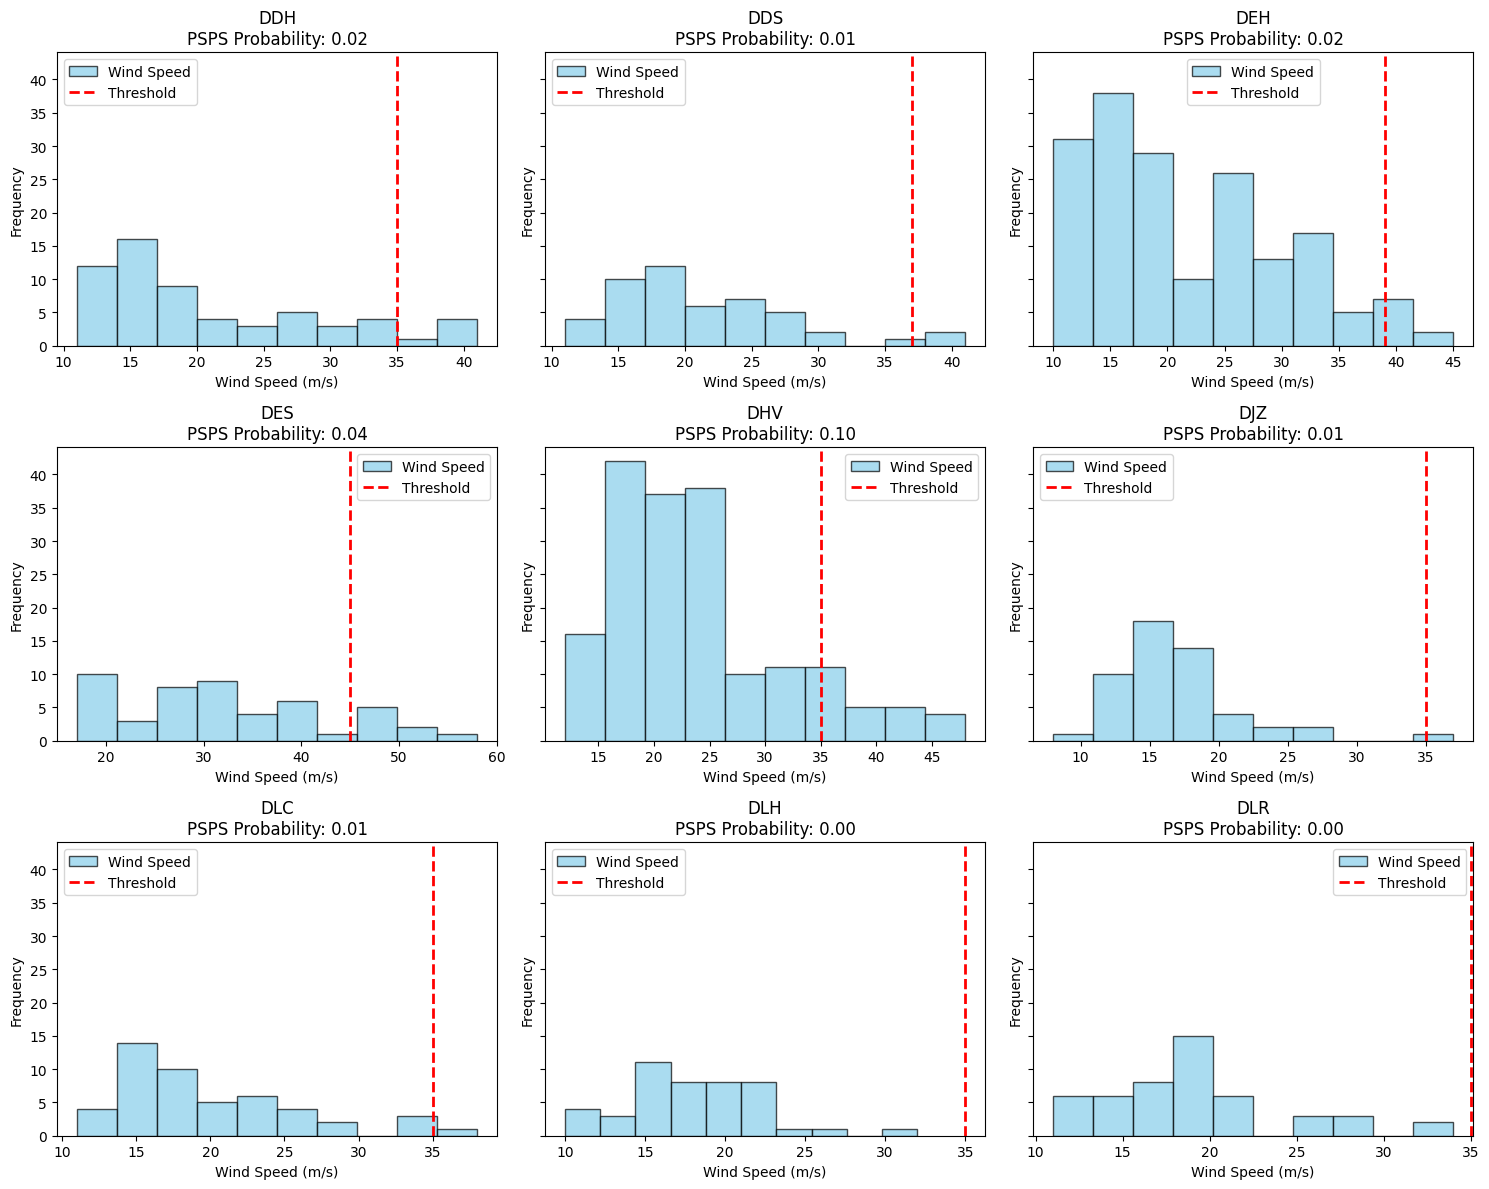

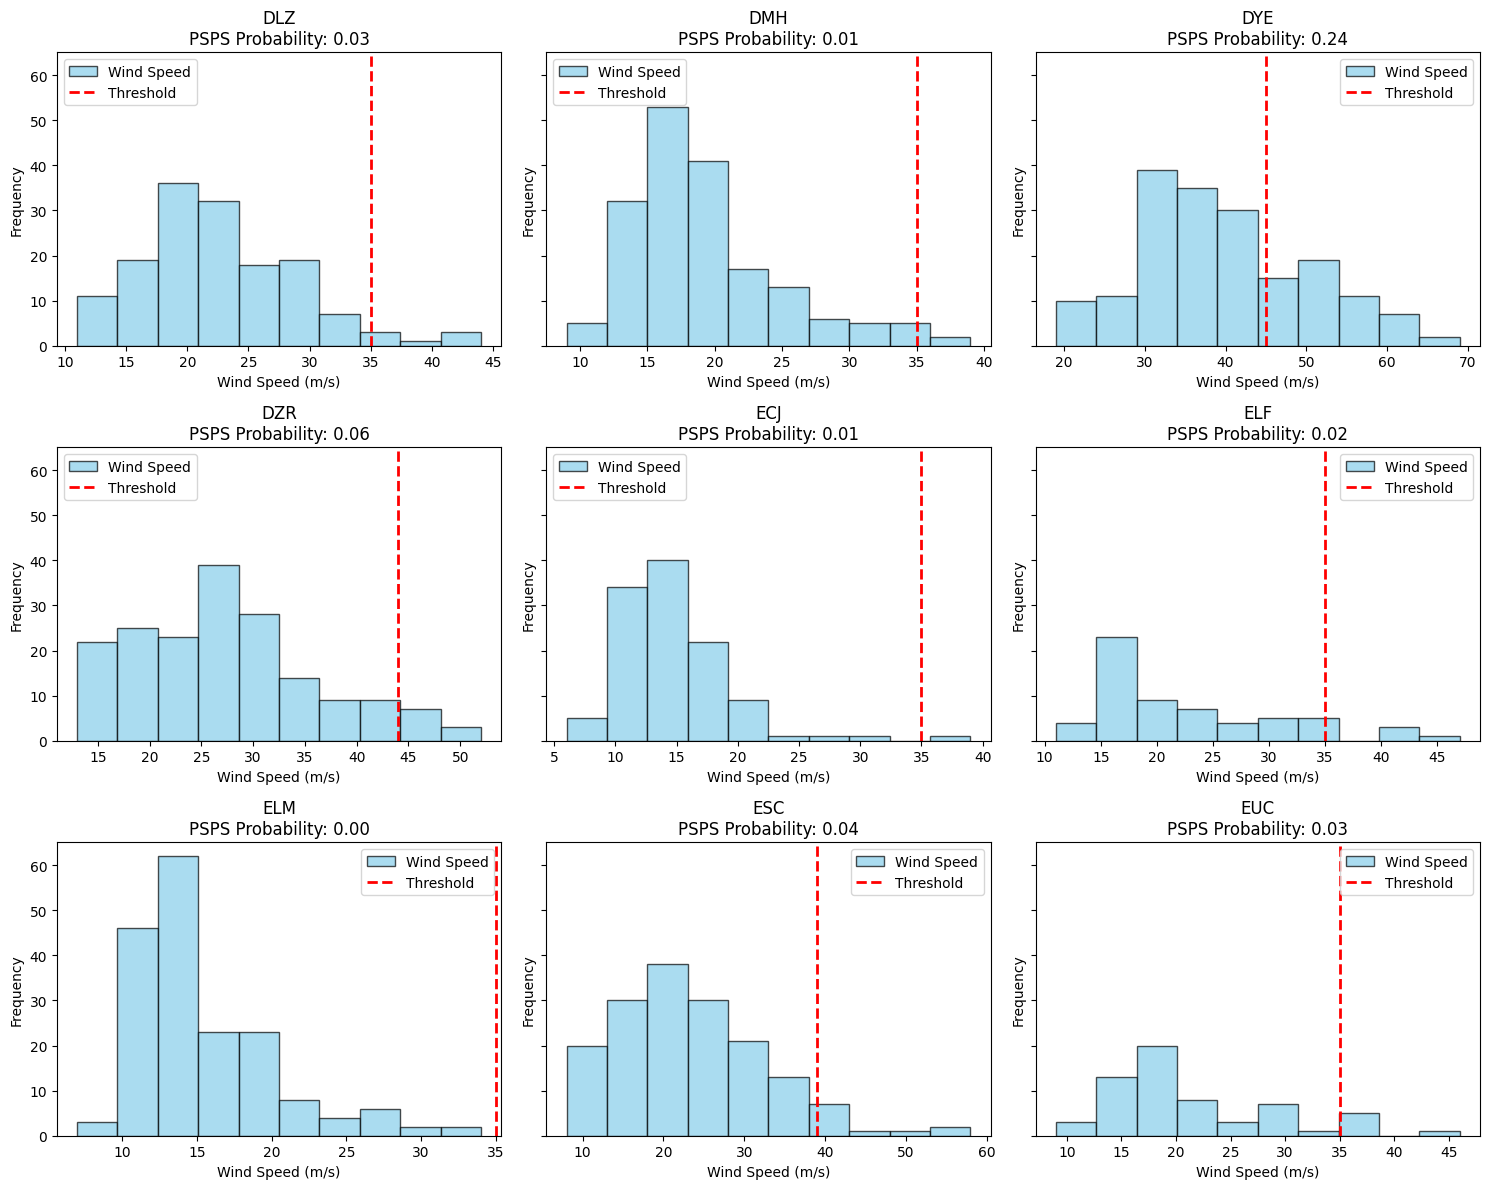

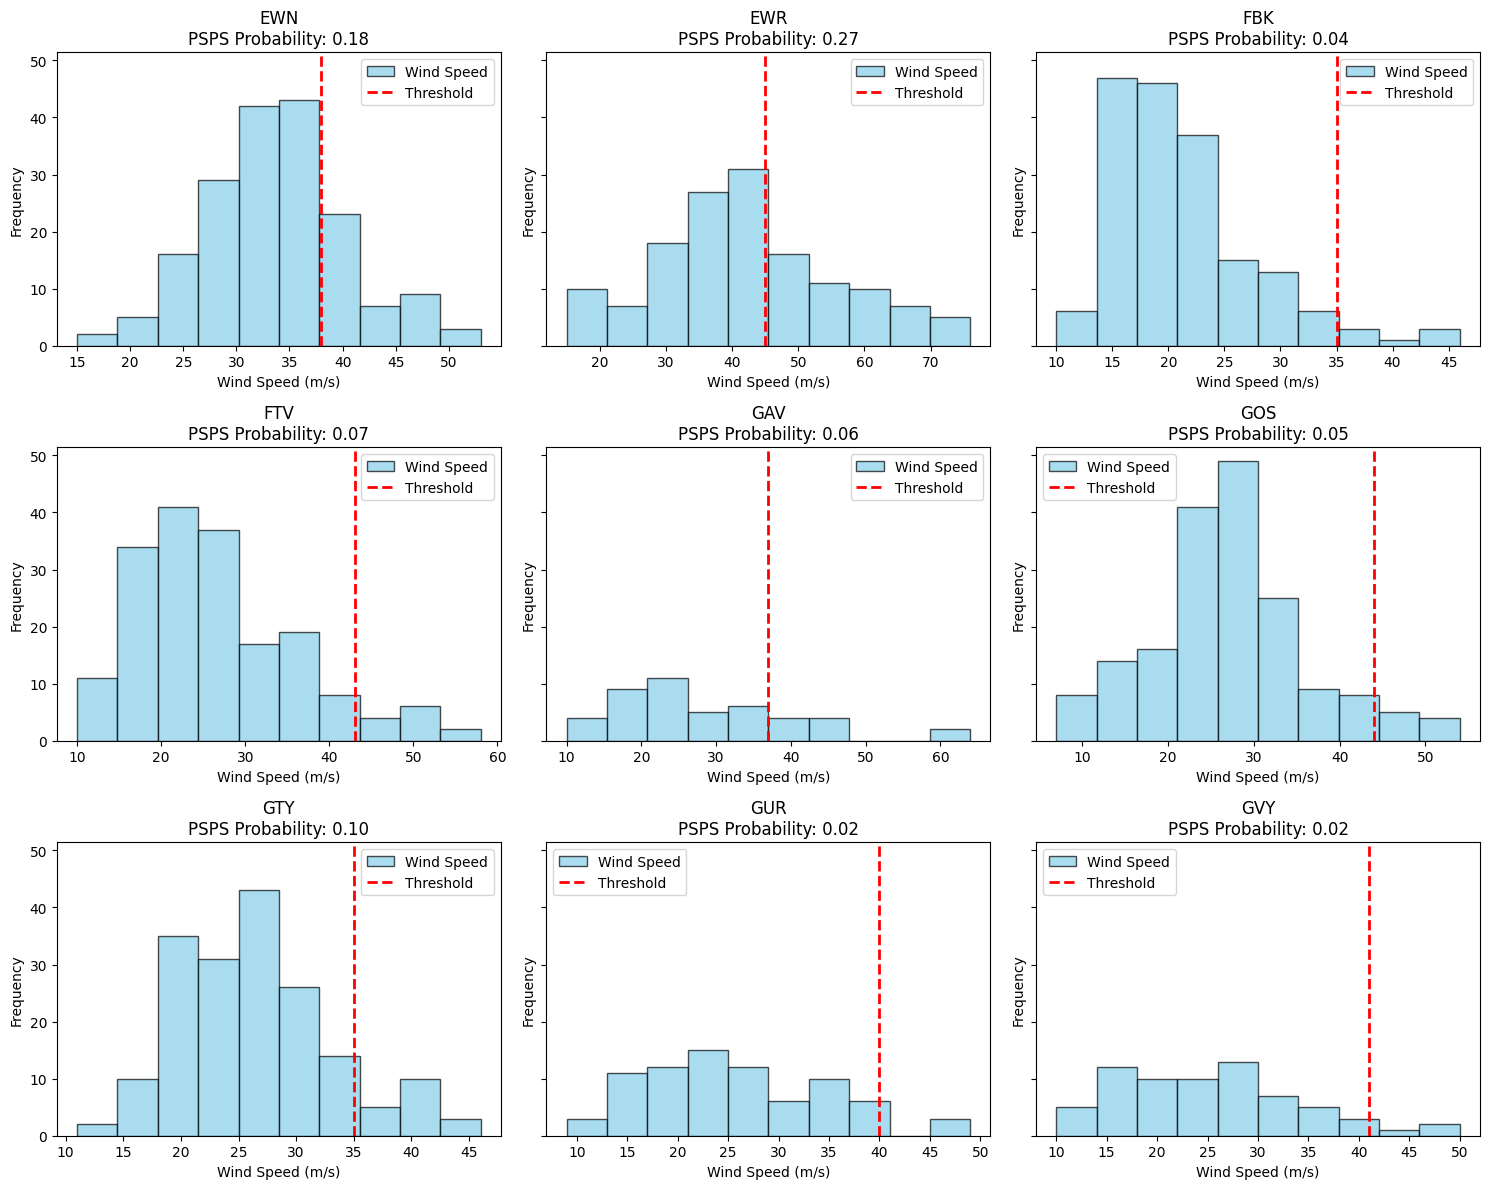

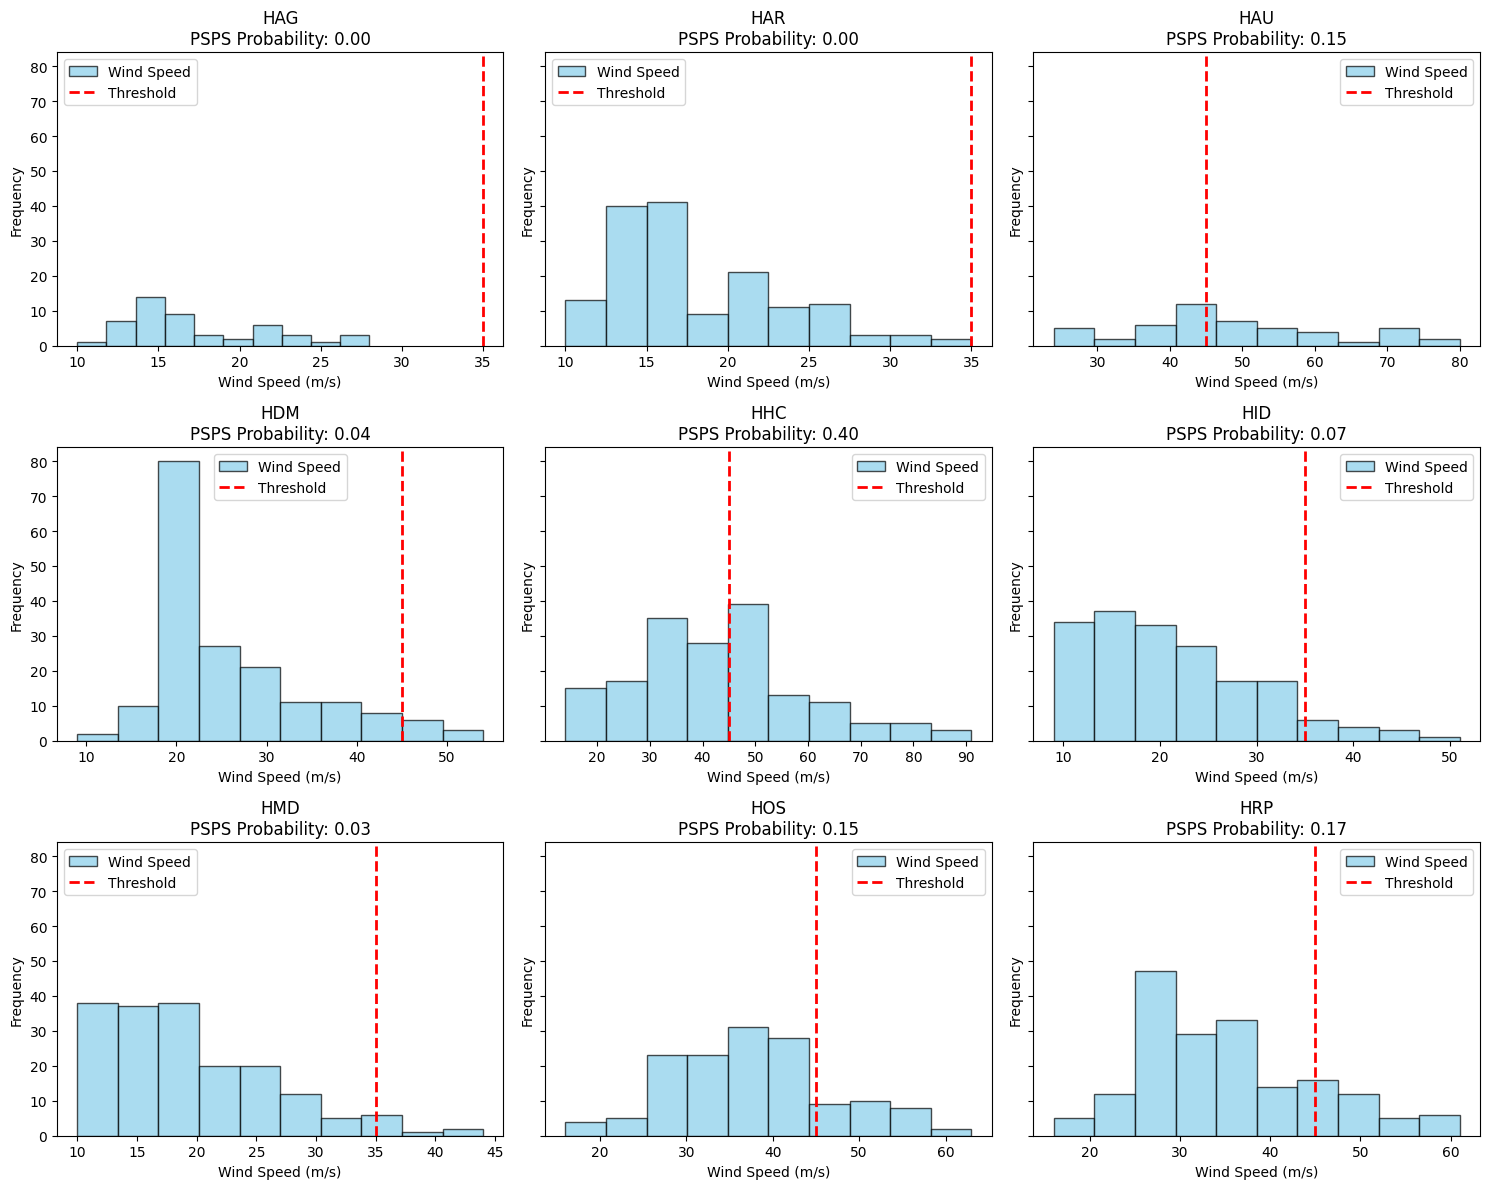

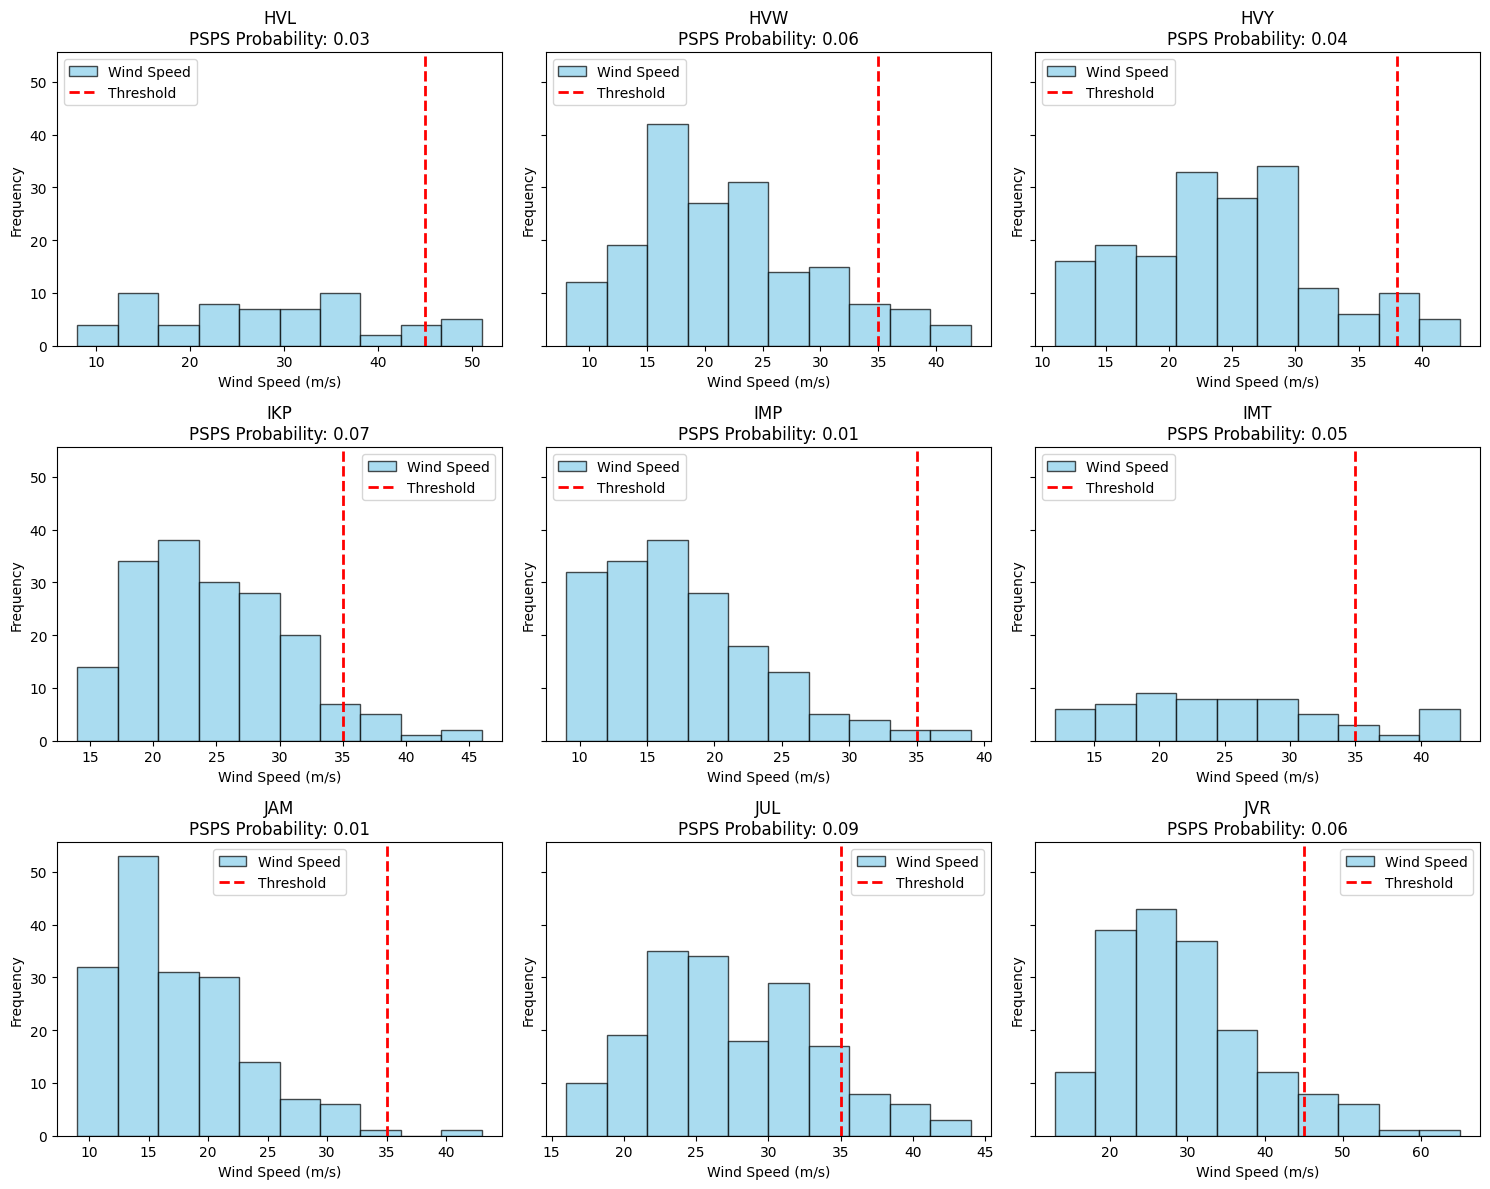

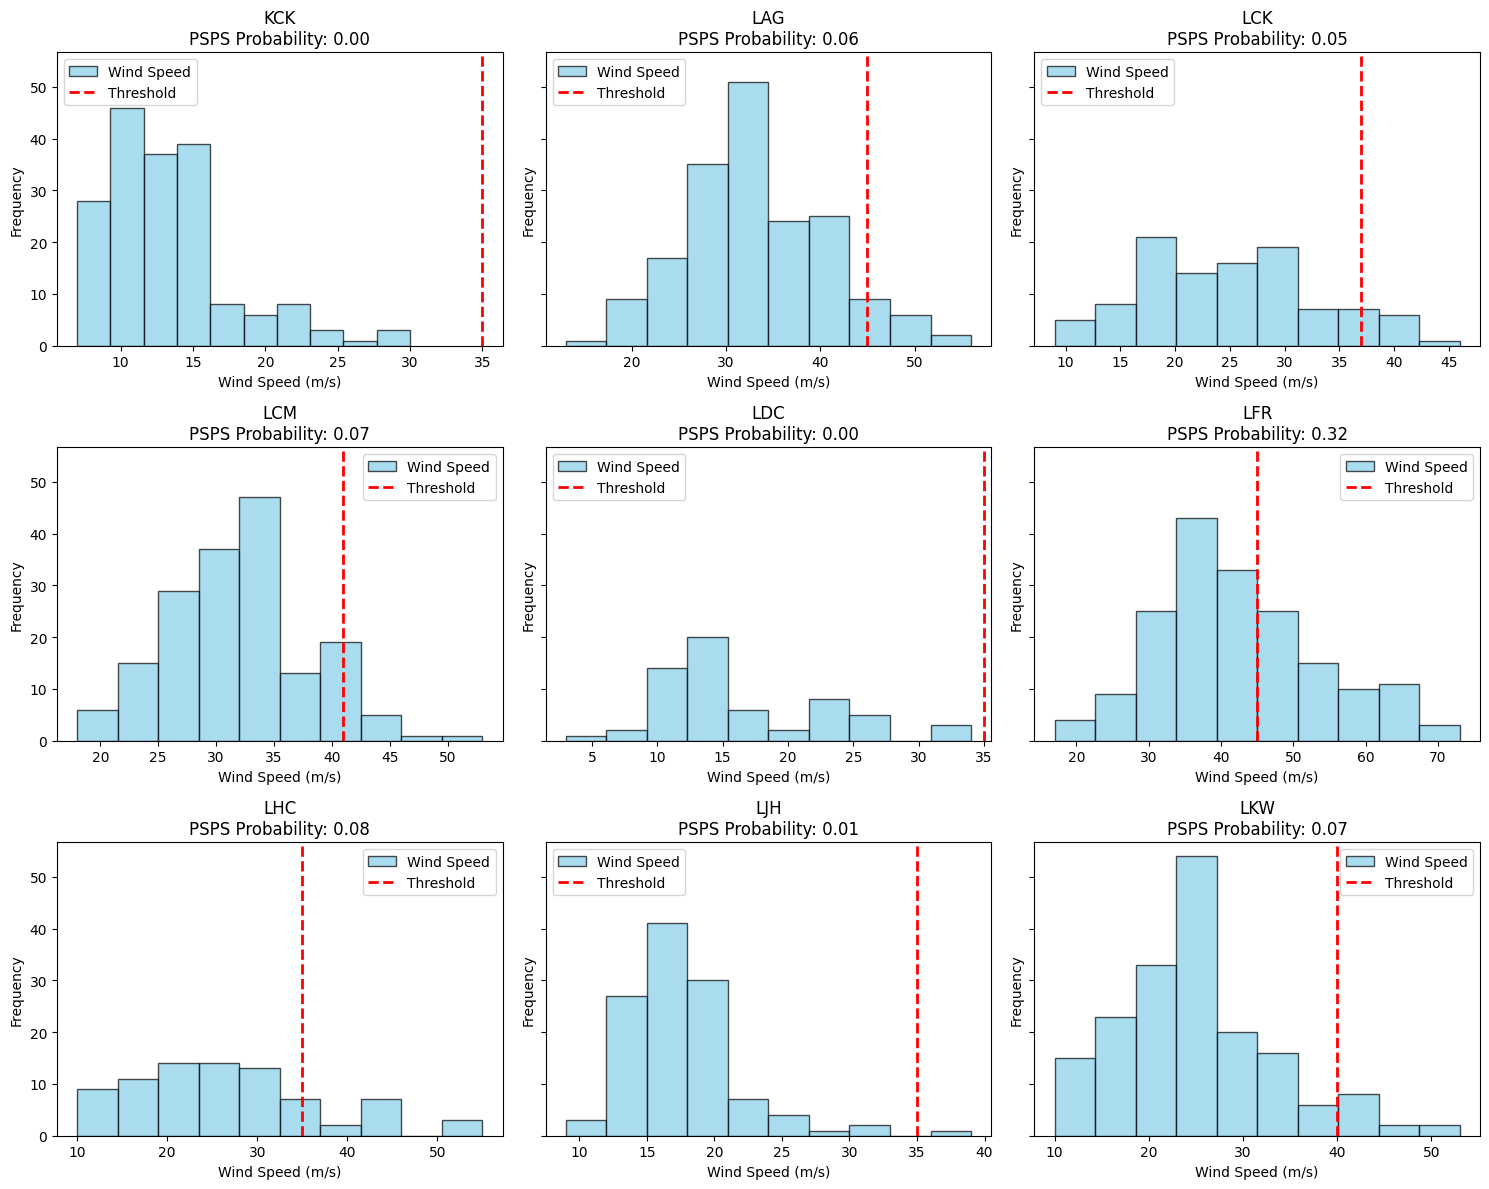

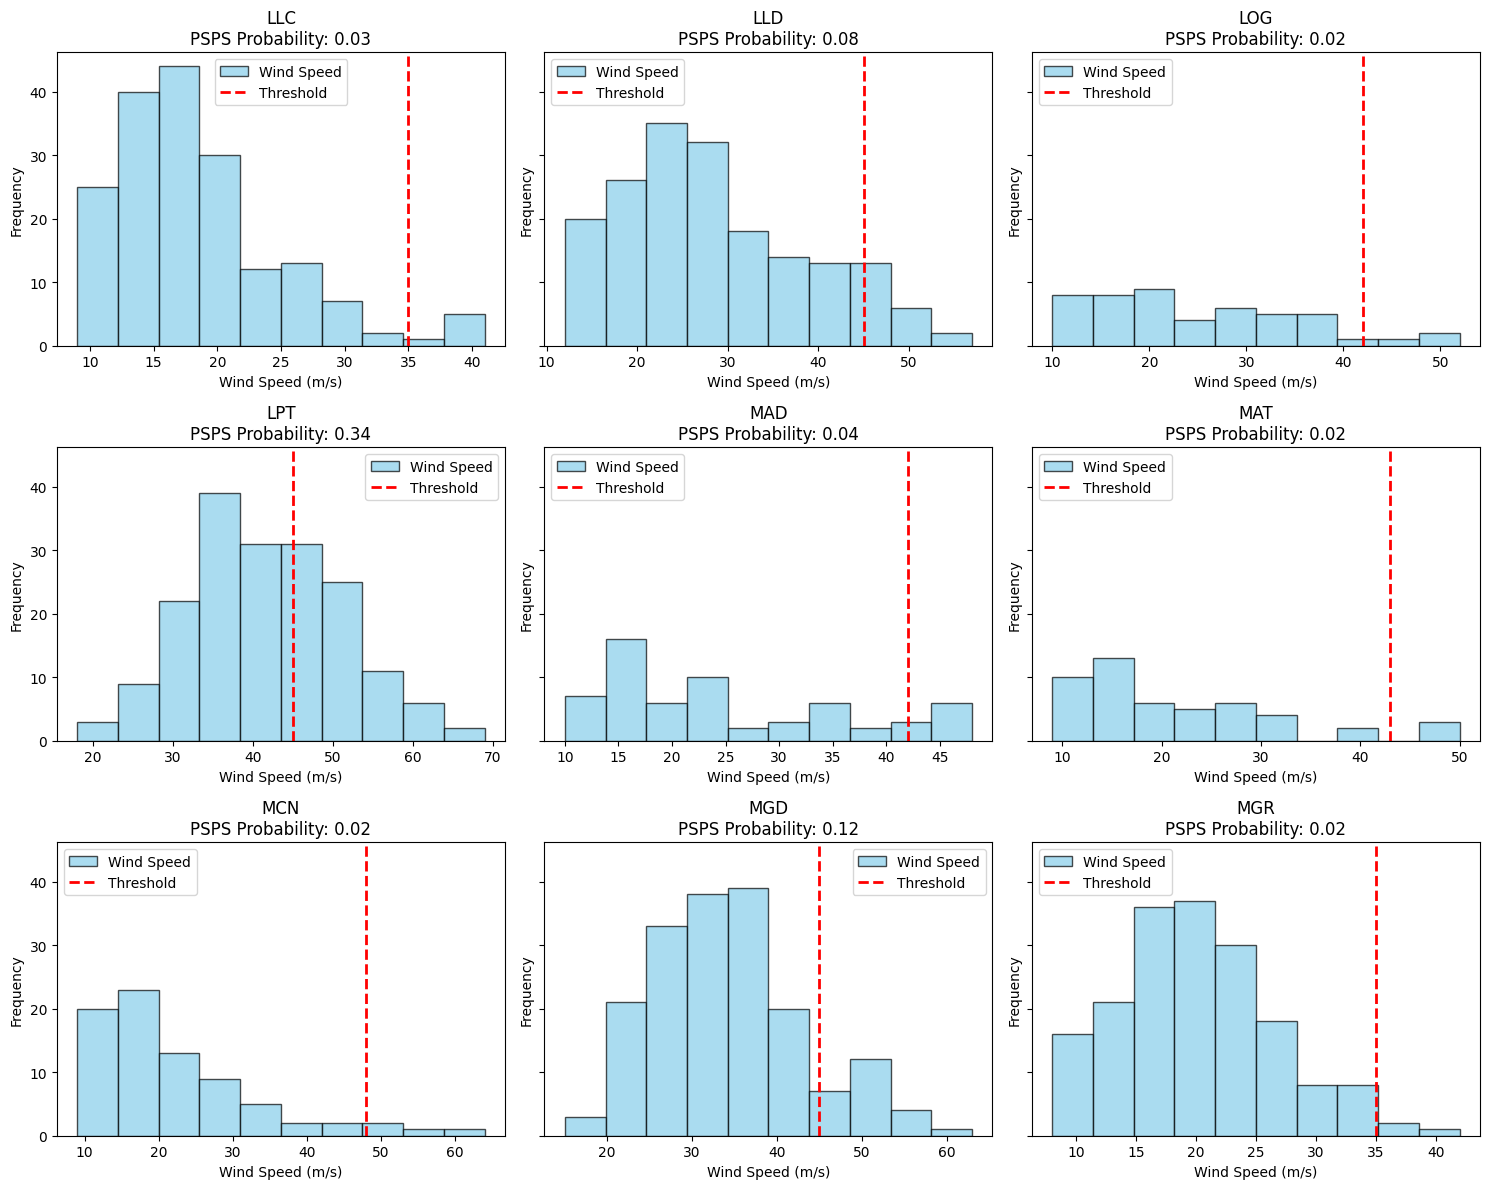

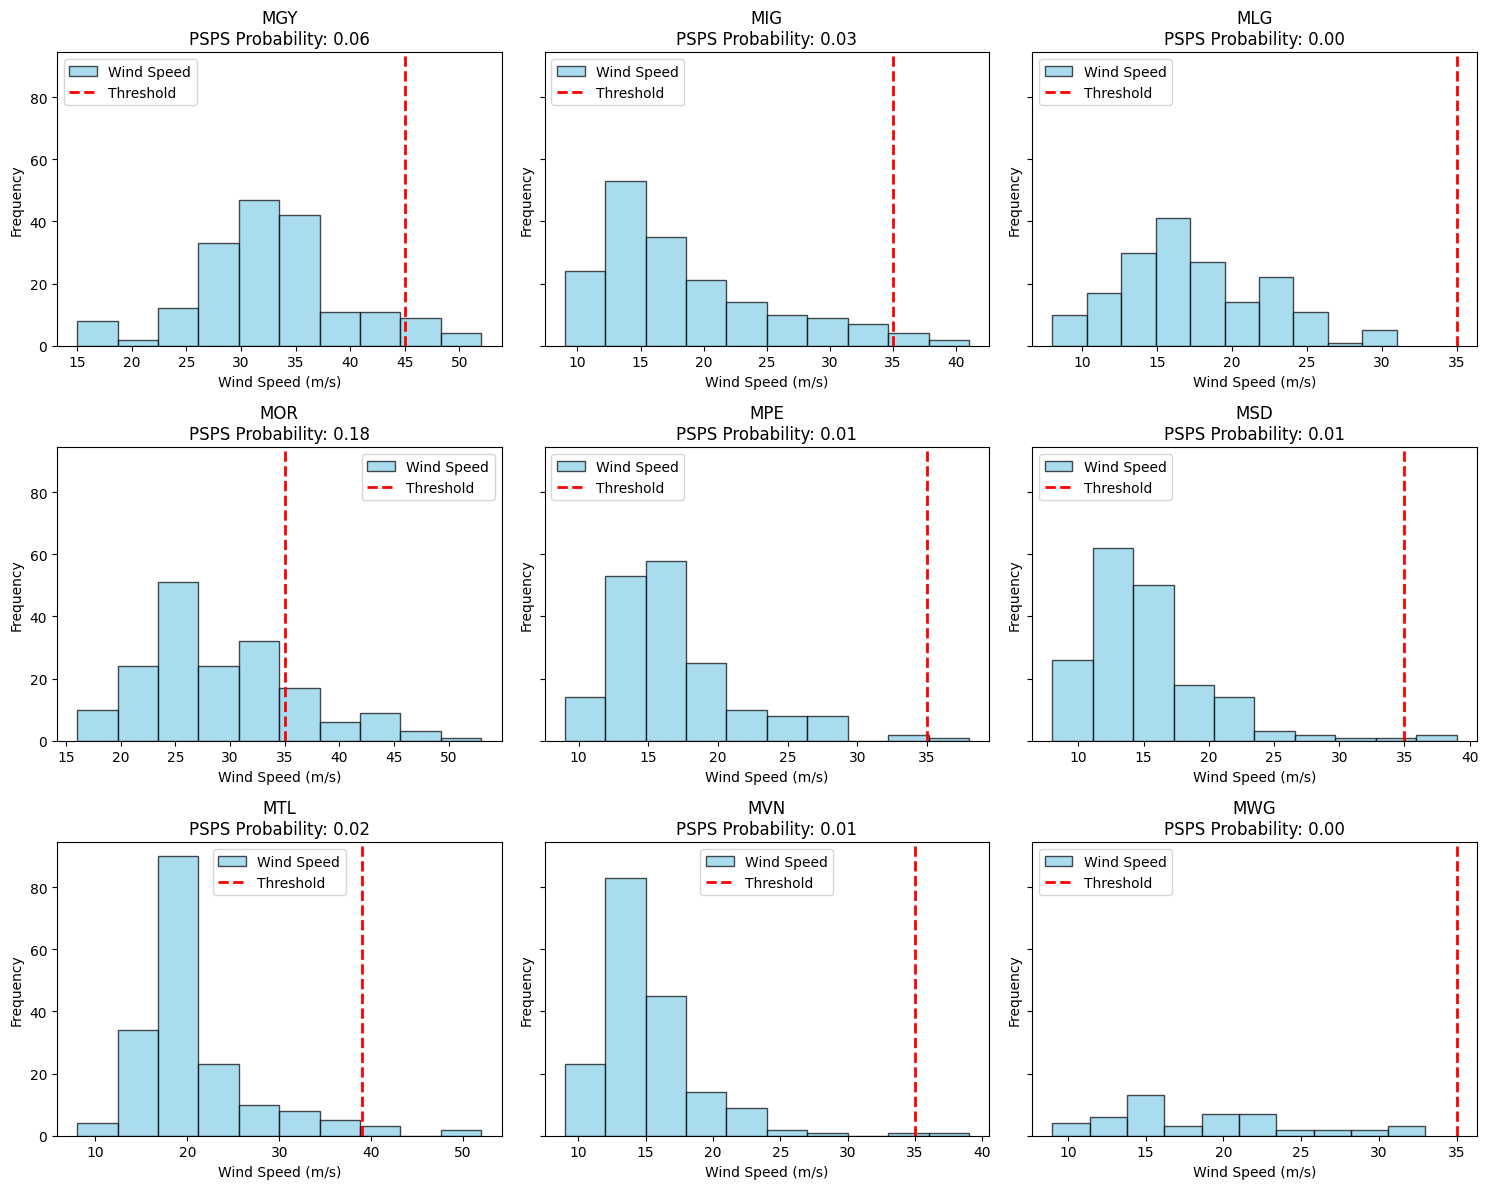

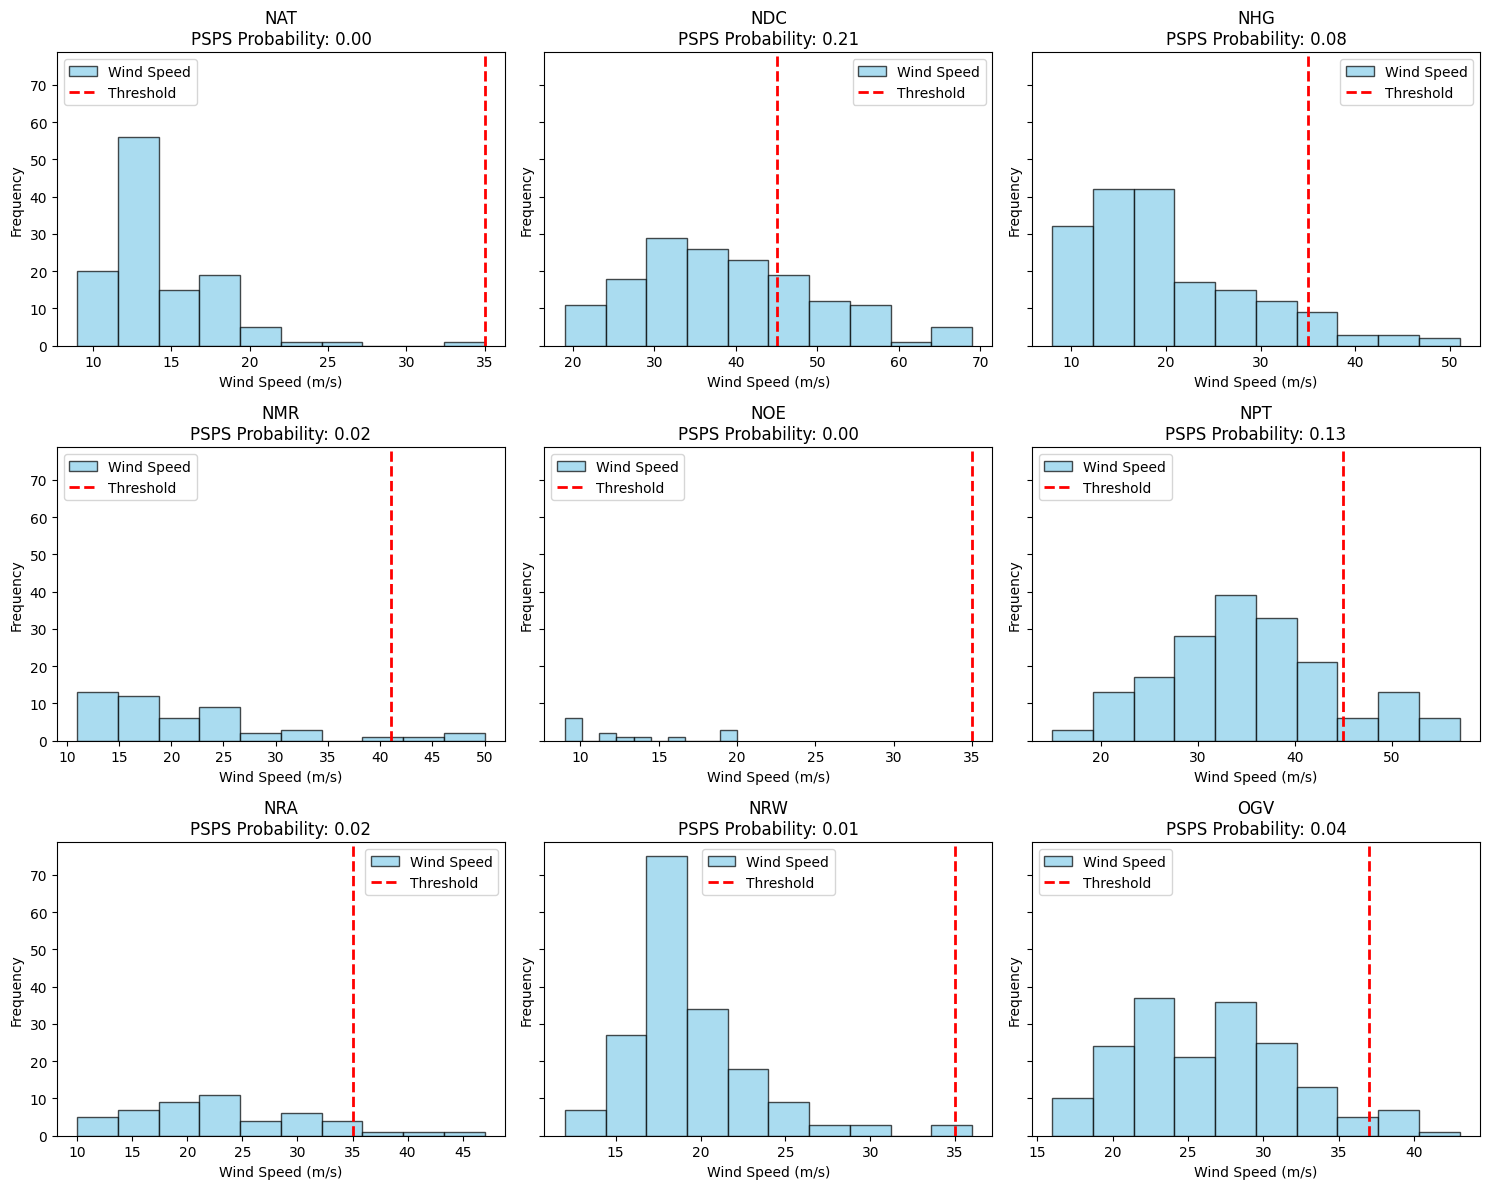

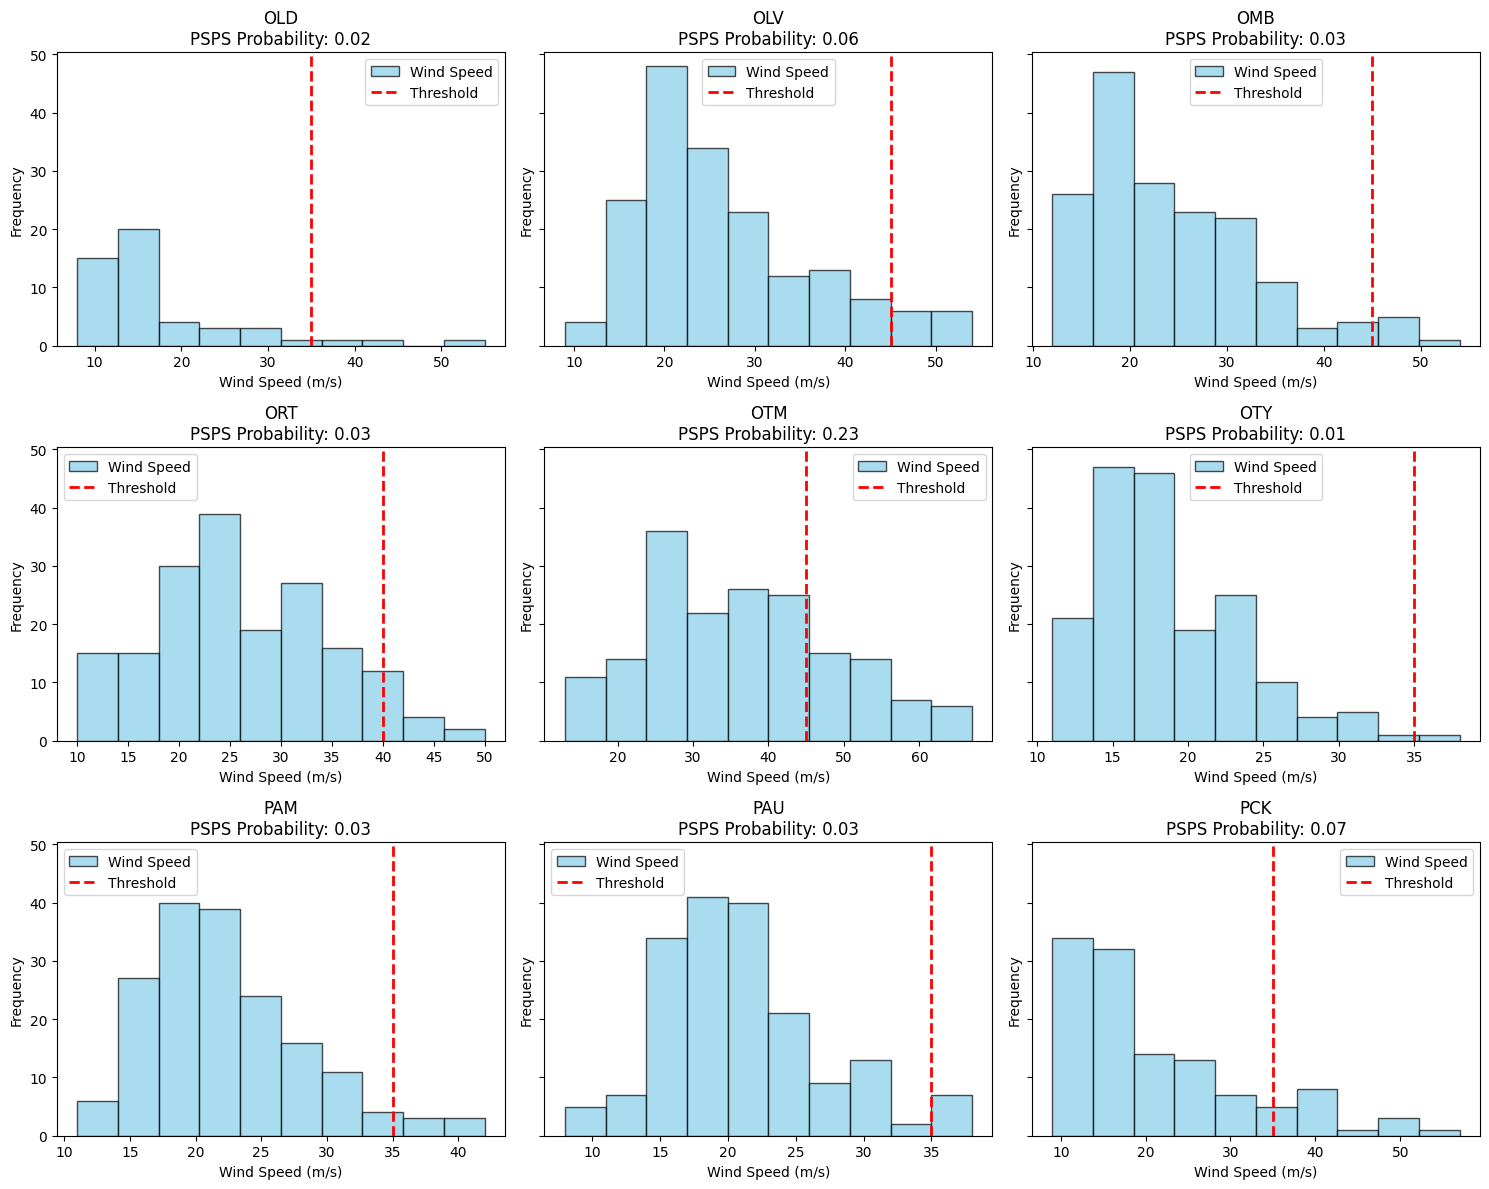

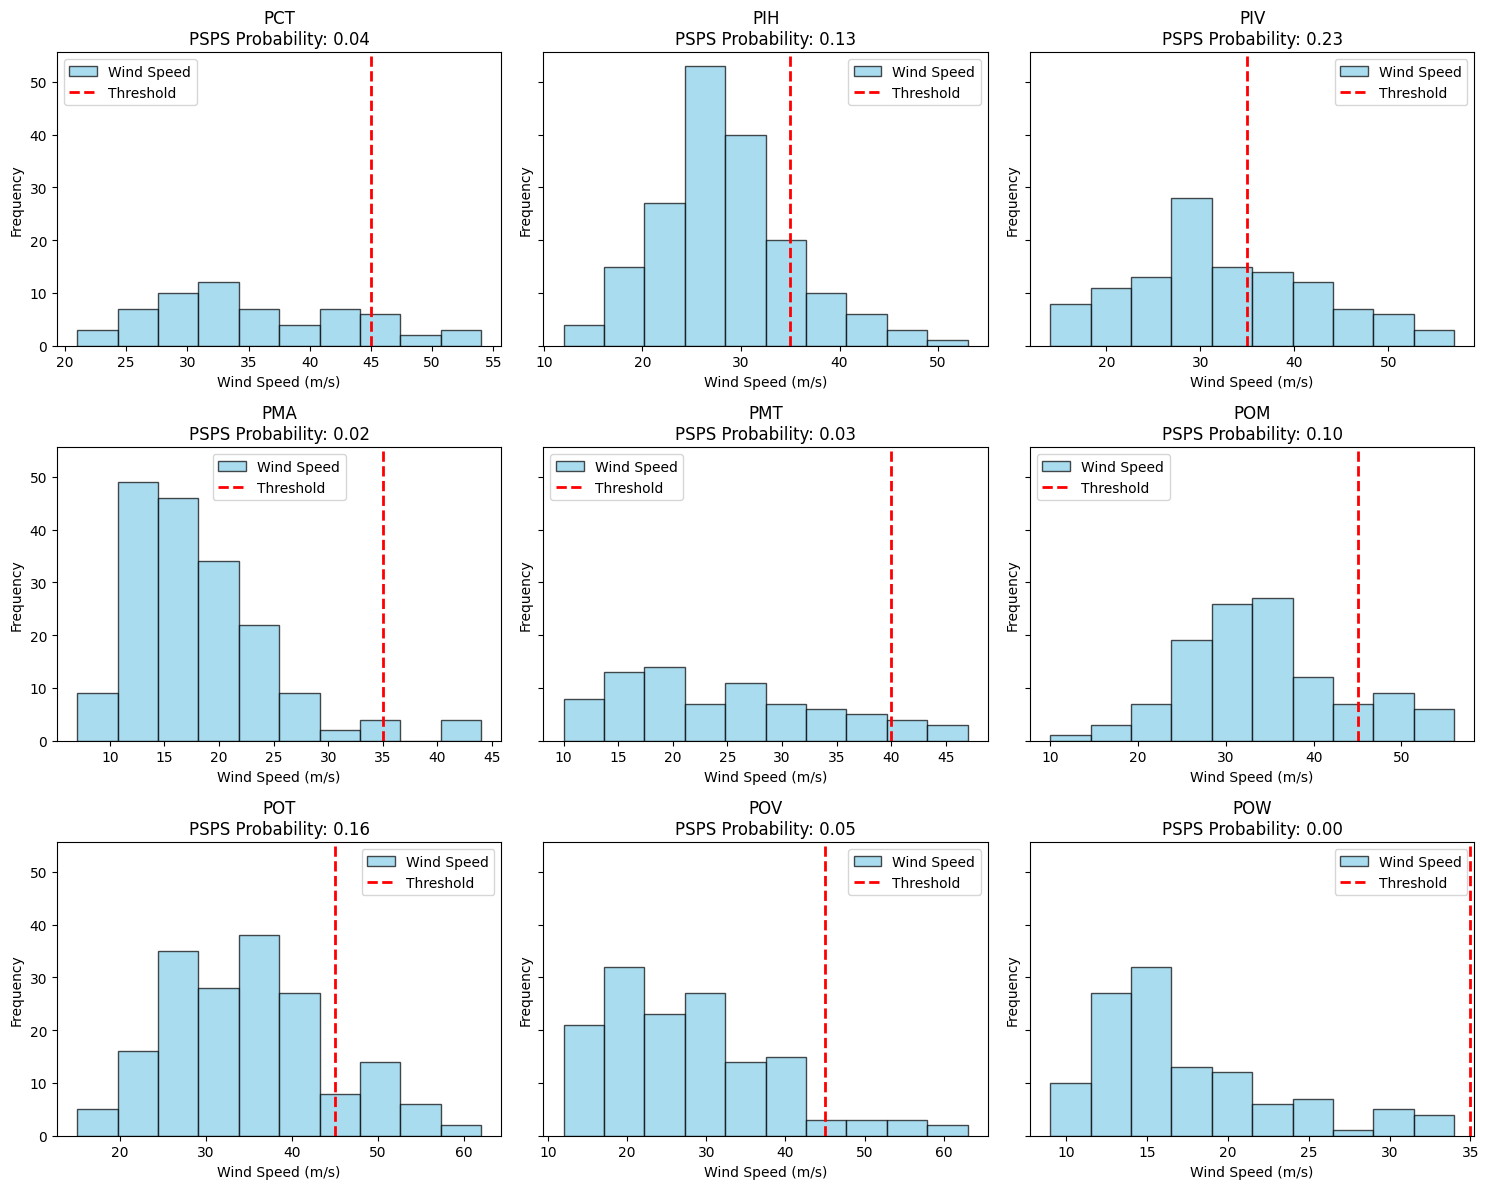

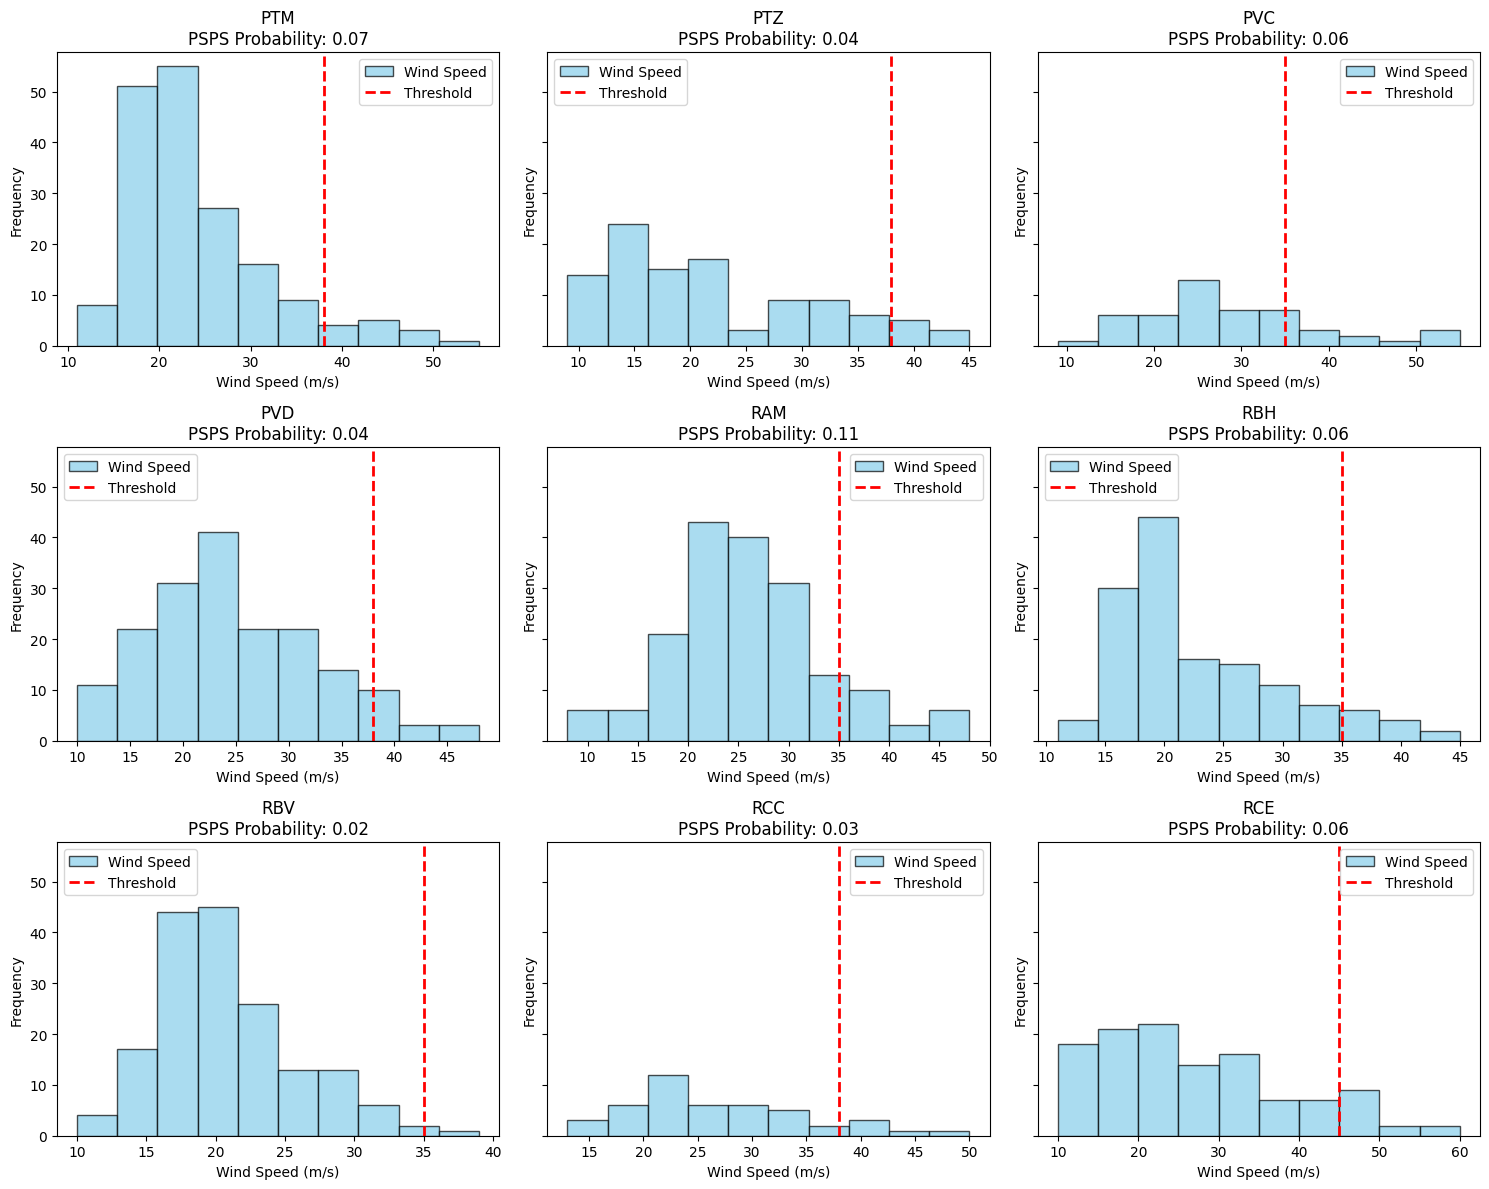

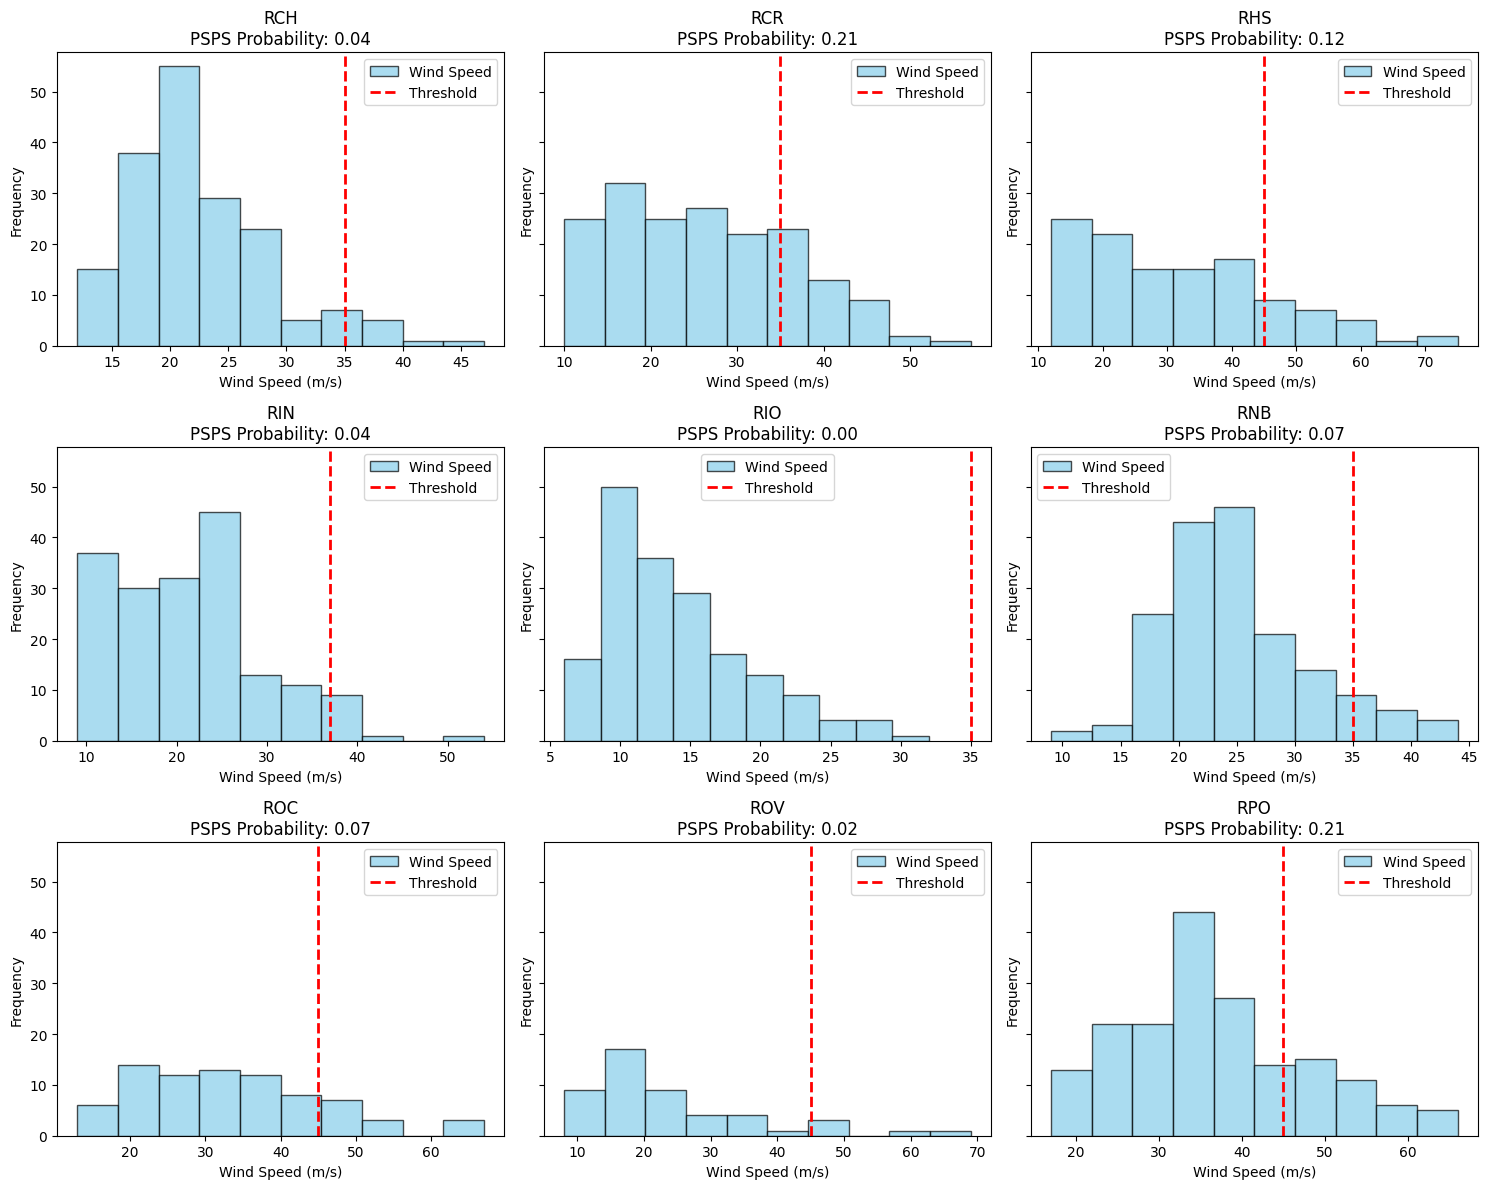

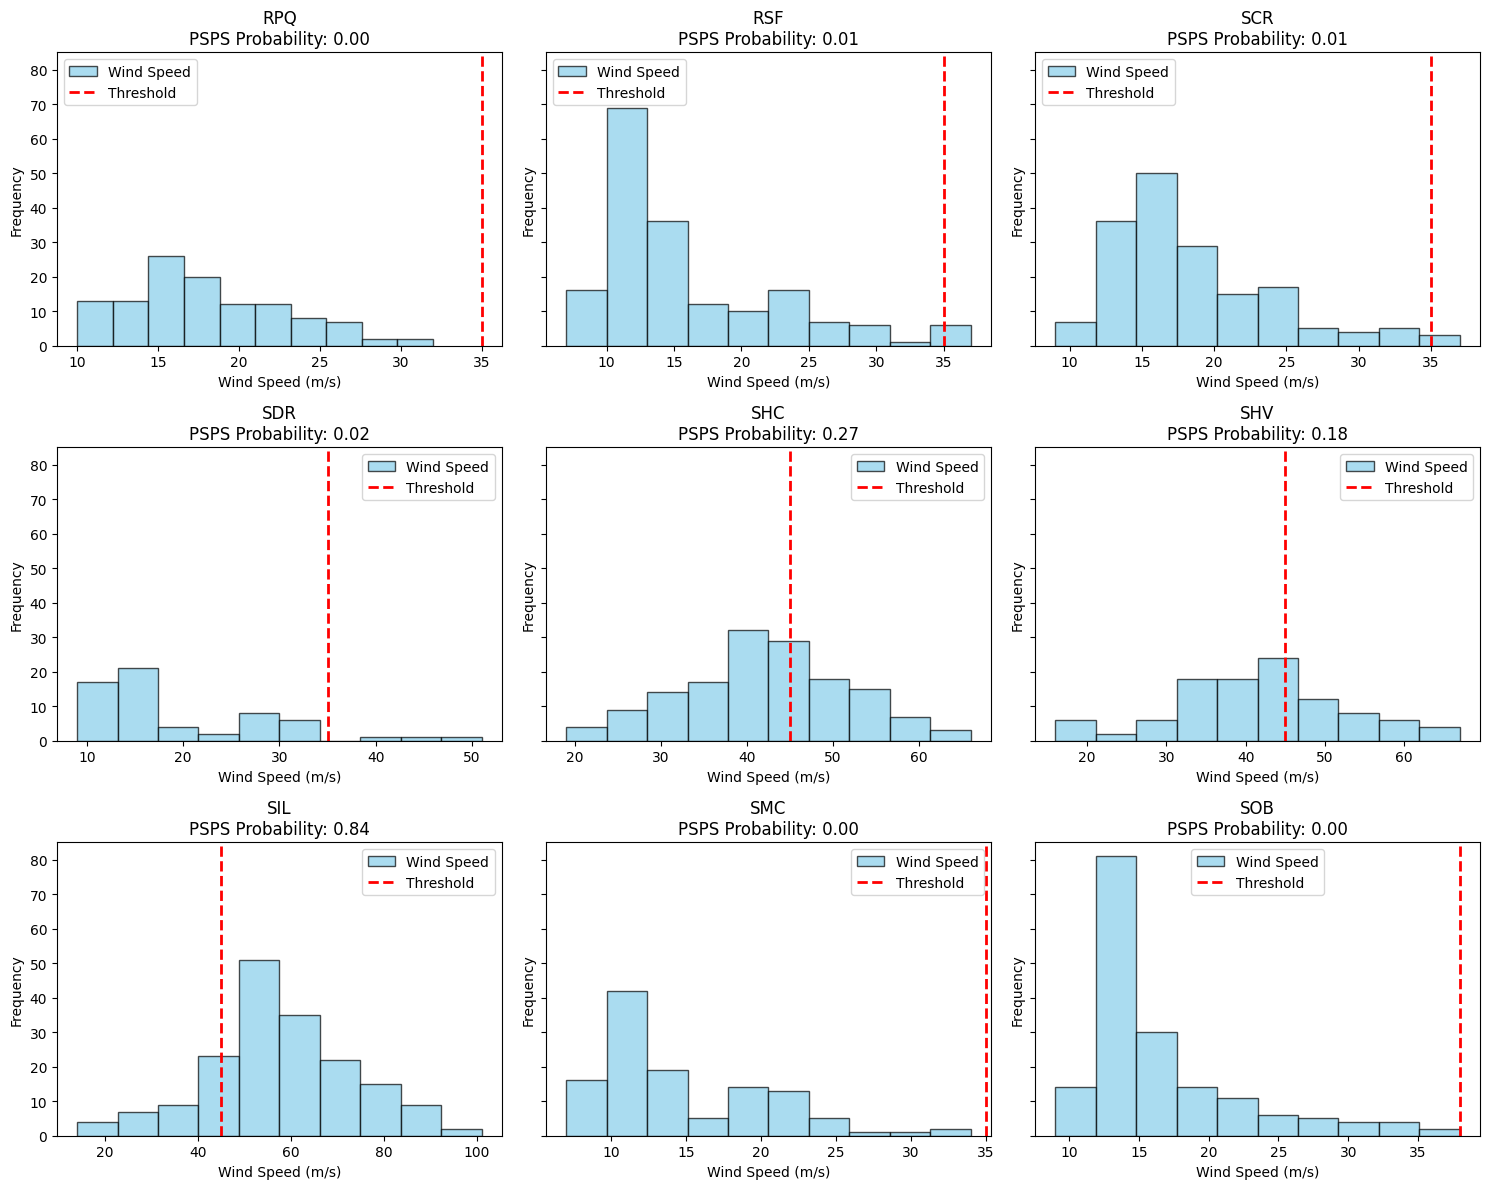

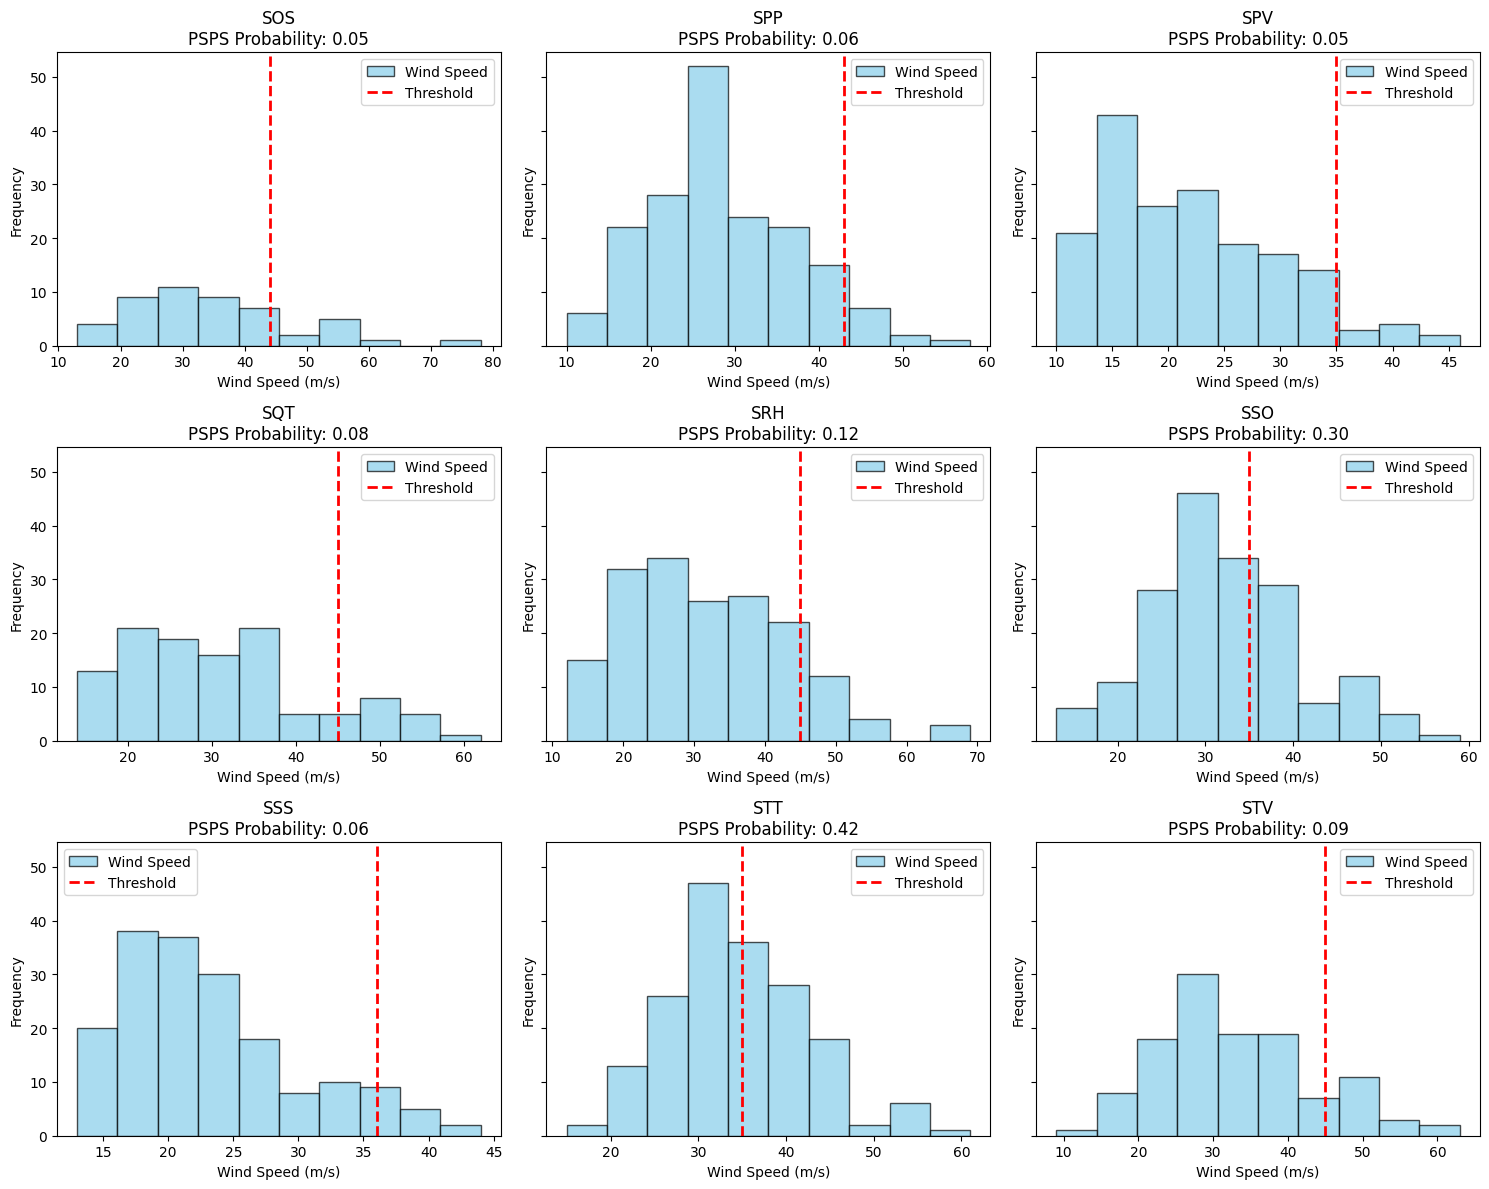

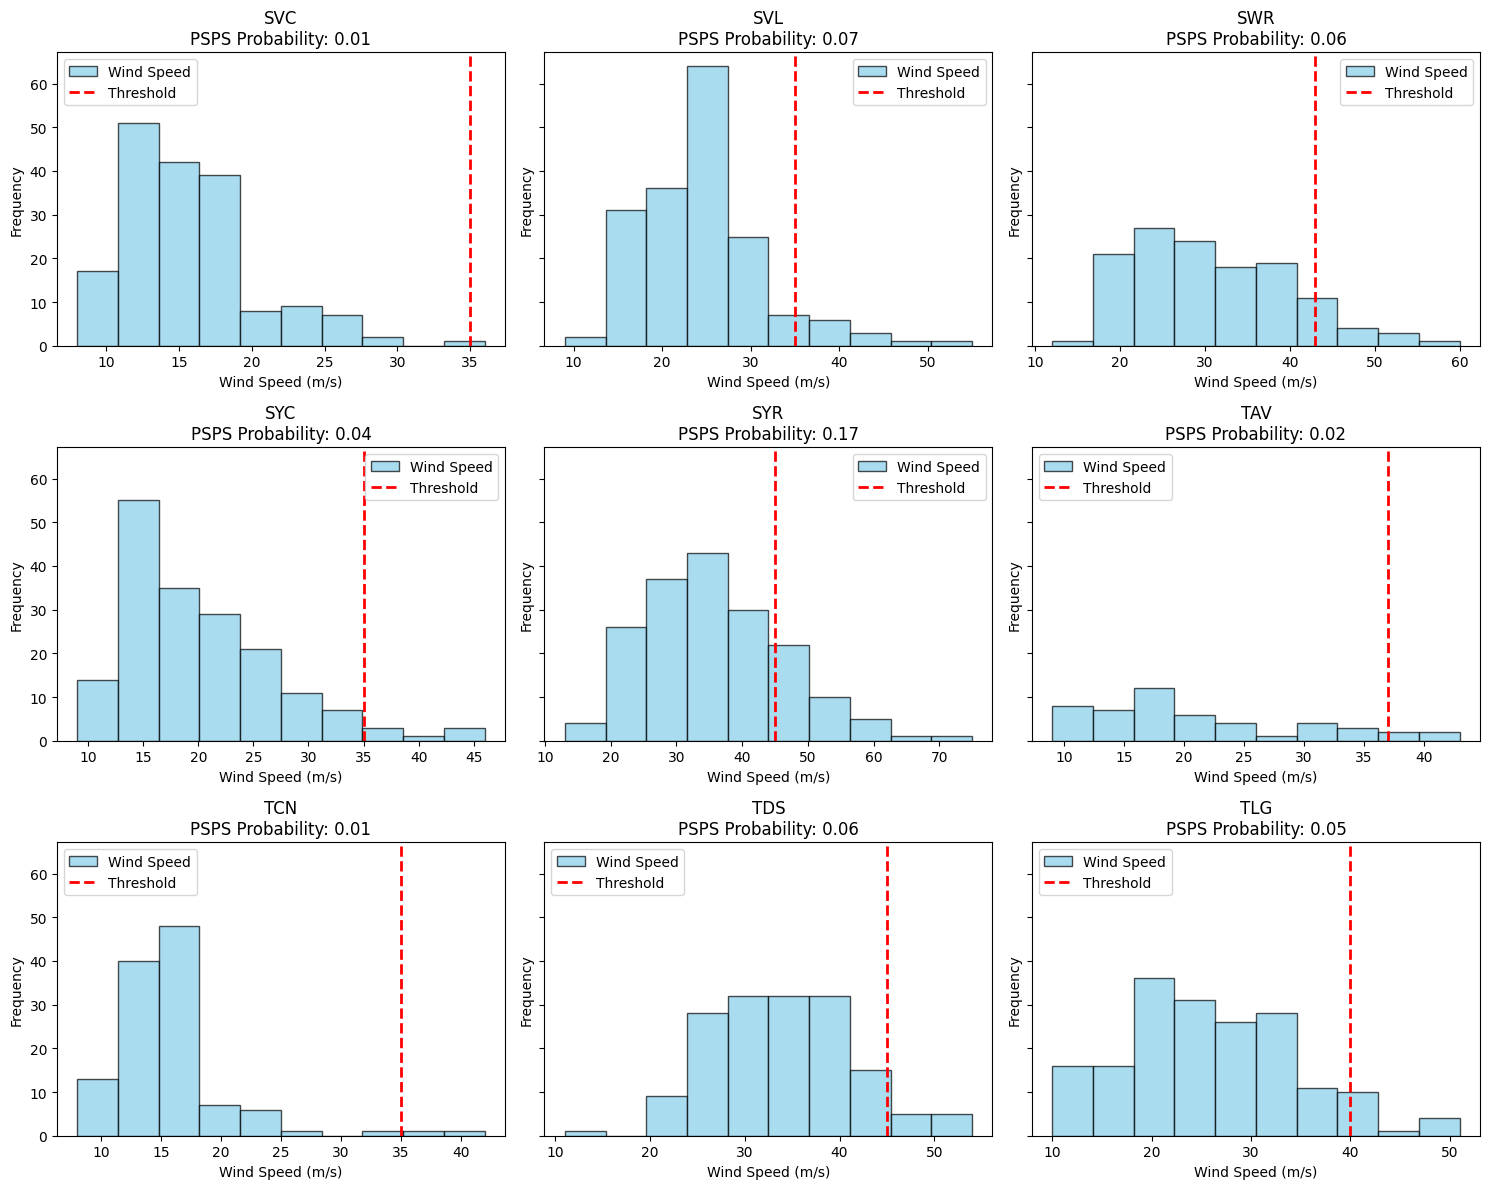

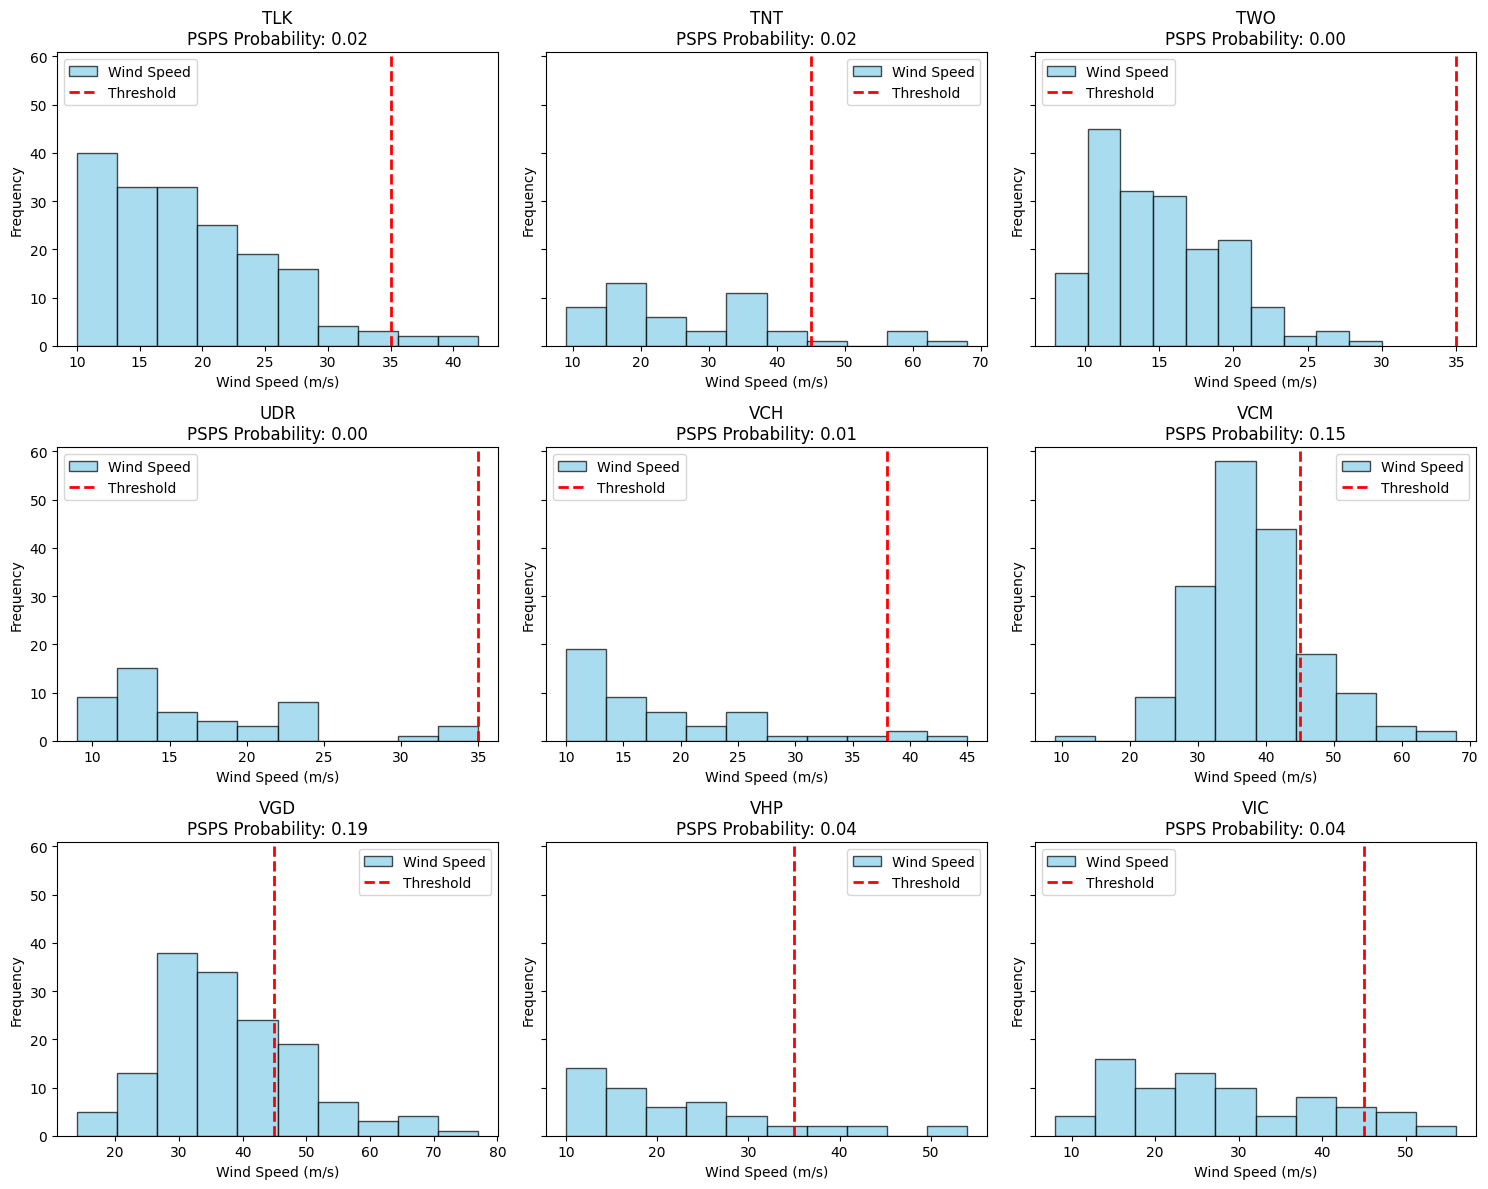

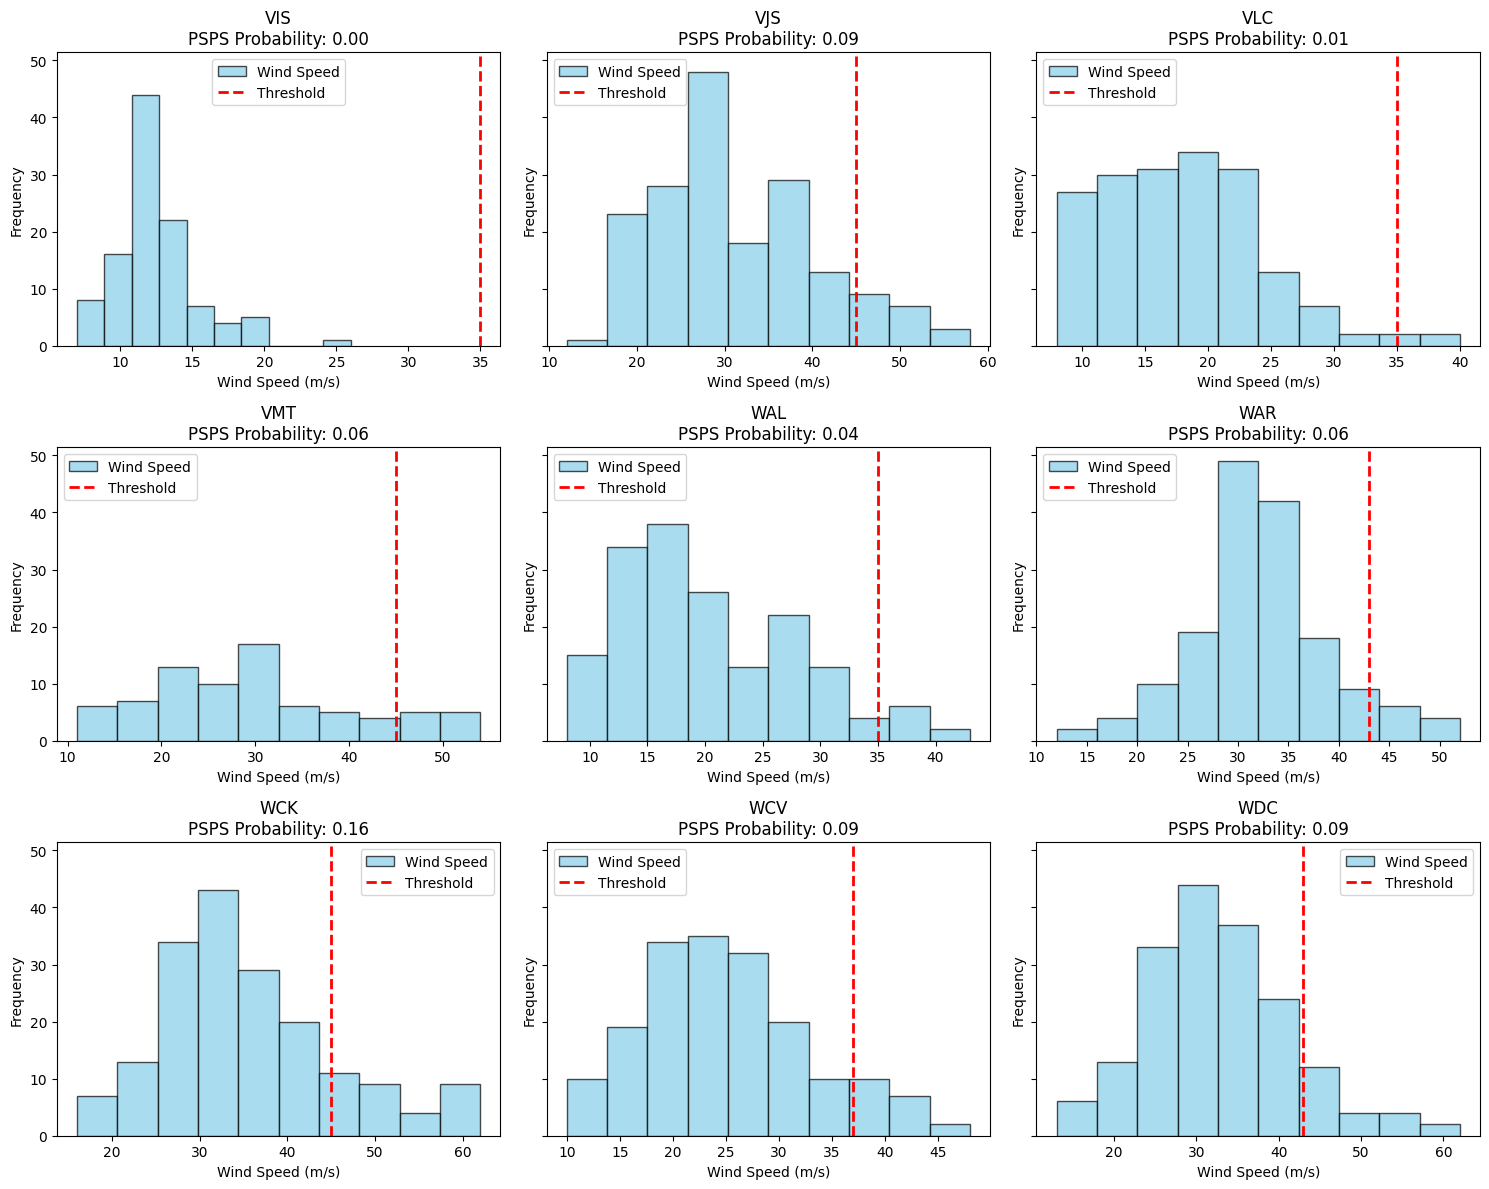

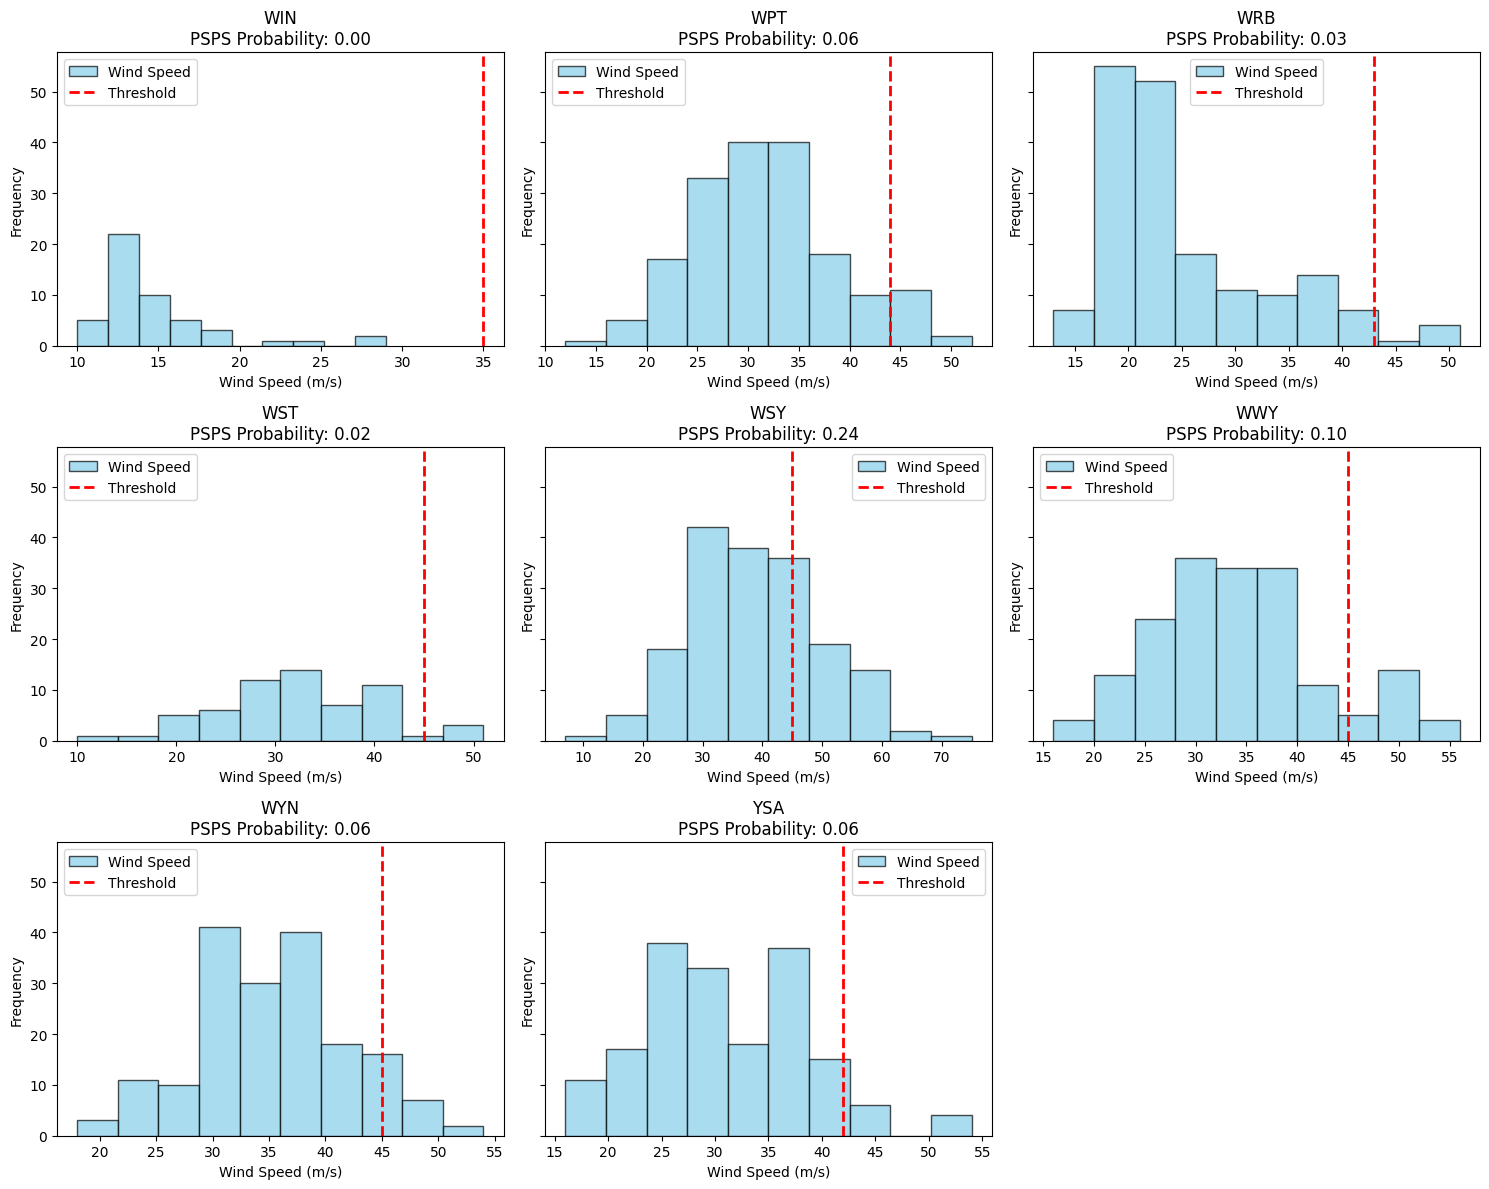

In [12]:
# Plot settings
stations_per_batch = 9  # Number of stations per figure (e.g., a grid of 3x3 subplots)
num_stations = len(grouped)
num_batches = (num_stations // stations_per_batch) + (num_stations % stations_per_batch > 0)

# Loop through batches
for batch in range(num_batches):
    start_idx = batch * stations_per_batch
    end_idx = min(start_idx + stations_per_batch, num_stations)
    
    # Create subplots for this batch
    fig, axes = plt.subplots(
        nrows=3,
        ncols=3,
        figsize=(15, 12),
        sharey=True,
        tight_layout=True
    )
    axes = axes.flatten()  # Flatten axes for easier iteration
    
    for ax_idx, (station_name, group) in enumerate(list(grouped)[start_idx:end_idx]):
        ax = axes[ax_idx]
        
        # Plot histogram of wind speeds
        ax.hist(group['wind_speed'], bins=10, alpha=0.7, color='skyblue', edgecolor='black', label='Wind Speed')
        
        # Add vertical line for wind speed threshold
        threshold = group['alert'].iloc[0]
        ax.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
        
        # Add title with PSPS probability
        psps_probability = group['percentage_of_PSPS_shutdown'].iloc[0]
        ax.set_title(f'{station_name}\nPSPS Probability: {psps_probability:.2f}')
        
        # Add labels and legend
        ax.set_xlabel('Wind Speed (m/s)')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # Hide unused subplots in the grid
    for ax in axes[len(list(grouped)[start_idx:end_idx]):]:
        ax.axis('off')
    
    # Save or show the plot for this batch
    plt.tight_layout()
    plt.savefig(f'weather_station_batch_{batch + 1}.png')  # Save each batch as a separate file
    plt.show()

# Task 3 Merging weather station data to conductor spans and displaying PSPS Probabilities across all 3 layers geospatially
- 1) Merge weather stations to VRI polygons
- 2) Merge VRI polgyons to Conductor Spans
- 3) Displaying PSPS Probabilities across all 3 layers geospatially

In [13]:
#merging weather station + alert data and vri data
station_vri_data = station_alert_data.merge(vri_data, left_on="weatherstationcode", right_on="anemometercode", how="inner")
station_vri_data = pd.merge(station_vri_data, weather_station_psps_prob_data, on='weatherstationcode')
def rename_columns(col):
    if col.endswith('_x'):
        return col[:-2] + '_station'
    elif col.endswith('_y'):
        return col[:-2] + '_vri'
    return col

# Rename the columns
station_vri_data = station_vri_data.rename(columns=rename_columns)

In [14]:
station_vri_data

,objectid,weatherstationcode,weatherstationname,scadartuid,structureid_station,nwszone,district_station,thomasbrospagegrid,constructionstatus,creationuser,...,hftd_vri,hftdidc_vri,zone1idc_vri,globalid_1,shape_length,shape_area,shape_vri,shape_srid_vri,snapshot_date_vri,percentage_of_PSPS_shutdown
0,1,CBD,Carlsbad,5158.0,P124785,Coastal-243,6.0,1126-G1,A,seu_gis_elec,...,Non-HFTD,N,N,{C20D60A1-F6E8-4FD3-AF1F-C54B1A26E6DA},38417.323143,2.768495e+07,"MULTIPOLYGON Z (((-117.328519 33.134906 0, -11...",4326,2024-03-20,0.011173
1,2,CCR,Cuca Ranch,1915.0,Z118027,Mountain-258,3.0,1052-A5,A,seu_gis_elec,...,Tier 3,Y,N,{425B9034-E2AF-4A09-927E-3C2FC602F282},19938.846484,9.575396e+06,"MULTIPOLYGON Z (((-116.937336 33.301243 0, -11...",4326,2024-03-20,0.139665
2,3,CES,Country Estates,1995.0,Z416611,Inland Valley-250,3.0,1153-G7,A,seu_gis_elec,...,Tier 3,Y,N,{2F678369-E70E-4910-81F3-13694AB6283C},26301.367177,2.313316e+07,"MULTIPOLYGON Z (((-116.829876 33.055708 0, -11...",4326,2024-03-20,0.055866
3,208,ROV,Rim of the Valley,4818.0,Z416170,Inland Valley-250,3.0,1071-B1,A,gwharris,...,Tier 3,Y,N,{A55254D1-7241-4CD5-9B81-657736F23F79},12520.499687,7.042314e+06,"MULTIPOLYGON Z (((-116.999348 33.288843 0, -11...",4326,2024-03-20,0.022346
4,5,CHO,Chollas Lake,5182.0,P970712,Inland Valley-250,1.0,1270-C7,A,seu_gis_elec,...,Non-HFTD,N,N,{77A6C649-6E7F-4479-9494-C2D2C41B466D},4606.861999,6.008262e+05,"MULTIPOLYGON Z (((-117.072455 32.737506 0, -11...",4326,2024-03-20,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,221,OLV,Olivenhain,5128.0,Z181662,Inland Valley-250,3.0,1149-C1,A,seu_gis_elec,...,Tier 2,Y,N,{8972D3B2-3C74-44AF-A64B-A3587F5B5FCB},24964.903439,1.081265e+07,"MULTIPOLYGON Z (((-117.122818 33.095652 0, -11...",4326,2024-03-20,0.061453
204,223,BOB,Bob Owens Canyon,4841.0,Z571472,Inland Valley-250,4.0,1295-A7,A,CLCosby,...,Tier 3,Y,N,{B04F9EB5-5649-4D44-84D0-2E69771B1FD4},24615.103490,2.234286e+07,"MULTIPOLYGON Z (((-116.765238 32.658065 0, -11...",4326,2024-03-20,0.022346
205,224,MWG,MT. WOODSON GOLF CLUB,4827.0,P518334,INLAND VALLEY-250,3.0,1171-D3,A,KSTETS,...,Tier 3,Y,N,{BC63C13F-D408-4725-99D7-E47388CCF50D},22620.238075,1.904199e+07,"MULTIPOLYGON Z (((-116.990882 33.028726 0, -11...",4326,2024-03-20,0.000000
206,4,CGD,Cole Grade,1957.0,Z416193,Inland Valley-250,3.0,1070-G1,A,seu_gis_elec,...,Tier 2,Y,N,{029A03ED-5FE1-4A93-AA52-CAB3F5A47BD5},25266.872870,1.910482e+07,"MULTIPOLYGON Z (((-117.042606 33.293205 0, -11...",4326,2024-03-20,0.005587


In [15]:
#weather station and vri data + conductor span data geospatial span
import pandas as pd
import geopandas as gpd
from shapely import wkt


# Convert WKT strings to geometry objects for conductor data
conductor_data['geometry'] = conductor_data['shape'].apply(wkt.loads)

# Create GeoDataFrame from conductor data
gdf1 = gpd.GeoDataFrame(conductor_data, geometry='geometry', crs=f"EPSG:{conductor_data['shape_srid'].iloc[0]}")

# convert WKT string to geometry objects for conductor data
station_vri_data['geometry'] = station_vri_data['shape_vri'].apply(wkt.loads)
gdf2 = gpd.GeoDataFrame(station_vri_data, geometry='geometry', crs=f"EPSG:{station_vri_data['shape_srid_vri'].iloc[0]}")

# Ensure both GeoDataFrames have the same CRS
if gdf1.crs != gdf2.crs:
    gdf2 = gdf2.to_crs(gdf1.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(gdf1, gdf2, how="left", predicate="intersects")

# Post-processing steps
# Rename columns from VRI data to avoid confusion
columns_to_rename = [col for col in joined_gdf.columns if col in gdf2.columns and col != 'geometry']
joined_gdf = joined_gdf.rename(columns={col: f"{col}_vri" for col in columns_to_rename})
joined_gdf.columns = joined_gdf.columns.str.replace('vri_vri', 'vri')
# Drop unnecessary columns
columns_to_drop = ['index_right'] 
joined_gdf = joined_gdf.drop(columns=columns_to_drop, errors='ignore')

# Reset index if needed
joined_gdf = joined_gdf.reset_index(drop=True)

In [16]:
joined_gdf = pd.merge(joined_gdf, weather_station_psps_prob_data, left_on='weatherstationcode_vri', right_on ='weatherstationcode')

In [17]:
station_vri_data[['geometry']]

,geometry
0,"MULTIPOLYGON Z (((-117.328519 33.134906 0, -11..."
1,"MULTIPOLYGON Z (((-116.937336 33.301243 0, -11..."
2,"MULTIPOLYGON Z (((-116.829876 33.055708 0, -11..."
3,"MULTIPOLYGON Z (((-116.999348 33.288843 0, -11..."
4,"MULTIPOLYGON Z (((-117.072455 32.737506 0, -11..."
...,...
203,"MULTIPOLYGON Z (((-117.122818 33.095652 0, -11..."
204,"MULTIPOLYGON Z (((-116.765238 32.658065 0, -11..."
205,"MULTIPOLYGON Z (((-116.990882 33.028726 0, -11..."
206,"MULTIPOLYGON Z (((-117.042606 33.293205 0, -11..."


In [18]:
#plotting weather stations and psps probabilites

In [19]:
station_psps_data = pd.merge(cleaned_station_data,weather_station_psps_prob_data, on = "weatherstationcode")

In [20]:
center_lat = station_psps_data['latitude'].mean()
center_lon = station_psps_data['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

In [21]:
for _, station in station_psps_data.iterrows():
    folium.Marker(
        location=[station['latitude'], station['longitude']],
        popup=f"Station: {station['weatherstationname']}<br>PSPS Probability: {station['percentage_of_PSPS_shutdown']:.2f}",
        tooltip=station['weatherstationname']
    ).add_to(m)

# Save the map
m.save("weather_stations_map.html")

In [22]:
vri_data_psps_prob = pd.merge(vri_data, weather_station_psps_prob_data, right_on='weatherstationcode',left_on = "anemometercode")
# Assuming your DataFrame is named 'df'
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(vri_data_psps_prob, geometry=gpd.GeoSeries.from_wkt(vri_data_psps_prob['shape']))
gdf.set_crs(epsg=4326, inplace=True)
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=6)

# Function to style each featureSW
def style_function(feature):
    return {
        'fillColor': '#ffaf00',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7,
    }

# Add GeoJson layer
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['name', 'percentage_of_PSPS_shutdown', 'hftd'], aliases=['Name', 'Percentage_PSPS_Shutdown', 'HFTD']),
    popup=folium.GeoJsonPopup(fields=['name', 'vri_risk', 'hftd', 'gust_max'], aliases=['Name', 'VRI Risk', 'HFTD', 'Max Gust'])
).add_to(m)

# Save the map
m.save("vri_shapes_pspsprob.html")


C:\Users\William\AppData\Local\Temp\ipykernel_18968\1634227136.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=6)


In [76]:
colormap = cm.LinearColormap(
    colors=['green', 'yellow', 'red'],
    vmin=gdf['percentage_of_PSPS_shutdown'].min(),
    vmax=gdf['percentage_of_PSPS_shutdown'].max(),
    caption='PSPS Shutdown Probability'
)

# Modify the style function to use the colormap
def style_function(feature):
    psps_value = feature['properties']['percentage_of_PSPS_shutdown']
    return {
        'fillColor': colormap(psps_value),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7,
    }

# Create the map
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], 
               zoom_start=6)

# Add GeoJson layer with the new style function
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'percentage_of_PSPS_shutdown', 'hftd'], 
        aliases=['Name', 'Percentage_PSPS_Shutdown', 'HFTD']
    ),
    popup=folium.GeoJsonPopup(
        fields=['name', 'vri_risk', 'hftd', 'gust_max'], 
        aliases=['Name', 'VRI Risk', 'HFTD', 'Max Gust']
    )
).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Save the map
m.save("vri_shapes_pspsprob2.html")

C:\Users\William\AppData\Local\Temp\ipykernel_18968\1798618580.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()],


# Task 4 Creating graph network object of spans to trace upstream/downtream the grid; collect list of weather stations that could cause a shut-off to any given span 

In [23]:
#drop duplicate station data
station_data = station_data.drop_duplicates(subset=['weatherstationcode'], keep='first')
#merge alert data to station data so for each station have alert threshold
alert_station_data = pd.merge(station_data,alert_data[['station','vri','alert']], left_on = 'weatherstationcode', right_on = 'station').drop('station',axis = 1)

station_vri_data = alert_station_data.merge(vri_data, left_on="weatherstationcode", right_on="anemometercode", how="inner")

# Define a function to rename columns
def rename_columns(col):
    if col.endswith('_x'):
        return col[:-2] + '_station'
    elif col.endswith('_y'):
        return col[:-2] + '_vri'
    return col

# Rename the columns
station_vri_data = station_vri_data.rename(columns=rename_columns)


In [24]:
#weather station and vri data + conductor span data geospatial span
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Assuming df1 is your Conductor span DataFrame and df2 is your VRI polygon DataFrame

# Convert WKT strings to geometry objects for df1
conductor_data['geometry'] = conductor_data['shape'].apply(wkt.loads)

# Create GeoDataFrame from df1
gdf1 = gpd.GeoDataFrame(conductor_data, geometry='geometry', crs=f"EPSG:{conductor_data['shape_srid'].iloc[0]}")

# Do the same for df2 if necessary
station_vri_data['geometry'] = station_vri_data['shape_vri'].apply(wkt.loads)
gdf2 = gpd.GeoDataFrame(station_vri_data, geometry='geometry', crs=f"EPSG:{station_vri_data['shape_srid_vri'].iloc[0]}")

# Ensure both GeoDataFrames have the same CRS
if gdf1.crs != gdf2.crs:
    gdf2 = gdf2.to_crs(gdf1.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(gdf1, gdf2, how="left", predicate="intersects")

# Post-processing steps
# Rename columns from VRI data to avoid confusion
columns_to_rename = [col for col in joined_gdf.columns if col in gdf2.columns and col != 'geometry']
joined_gdf = joined_gdf.rename(columns={col: f"{col}_vri" for col in columns_to_rename})

# Drop unnecessary columns
columns_to_drop = ['index_right']  # Add any other columns you don't need
joined_gdf = joined_gdf.drop(columns=columns_to_drop, errors='ignore')

# Reset index if needed
joined_gdf = joined_gdf.reset_index(drop=True)

In [78]:
G = nx.DiGraph()

for _, row in conductor_data.iterrows():
    if pd.notnull(row['upstream_span_id']):
        upstream_id = row['upstream_span_id']
        current_id = row['globalid']
        G.add_edge(upstream_id, current_id)

KeyboardInterrupt: 

In [26]:
joined_gdf.columns.tolist()

['Unnamed: 0',
 'globalid',
 'ohug',
 'feederid',
 'upstreamardfacilityid',
 'is_span',
 'upstream_struct_id',
 'upstream_struct_age',
 'upstream_struct_material',
 'upstream_struct_hftd',
 'upstream_struct_type',
 'upstream_struct_workorderdate',
 'downstream_struct_id',
 'downstream_struct_age',
 'downstream_struct_material',
 'downstream_struct_hftd',
 'downstream_struct_type',
 'downstream_struct_workorderdate',
 'egress_population_max',
 'egress_potential_impact_max',
 'canyon_name',
 'in_coastal_canyons',
 'tribal_land_name',
 'in_tribal_land',
 'work_scope_hardened_date',
 'work_scope_budget_title',
 'work_scope_hardened_year',
 'wrrm_acrper100',
 'wrrm_bldper100',
 'wrrm_popper100',
 'wrrm_fbiper100',
 'wrrm_flper100',
 'wrrm_rosper100',
 'wrrm_desper100',
 'featureclass',
 'parent_feederid',
 'circuit_voltage',
 'seg_upstream_trace',
 'seg_downstream_trace',
 'num_strike_trees',
 'road_intersecting_miles',
 'conductor_age',
 'cond_workorderdate',
 'miles',
 'conductor_level',


In [27]:
new_joined_gdf = joined_gdf.merge(weather_station_psps_prob_data, left_on = 'station',right_on = "weatherstationcode",how = "left")

In [28]:
new_joined_gdf = new_joined_gdf[(new_joined_gdf['percentage_of_PSPS_shutdown'] > 0)]
new_joined_gdf = new_joined_gdf[['globalid','upstream_span_id', 'weatherstationcode_vri','parent_feederid']].drop_duplicates(subset = ['upstream_span_id','weatherstationcode_vri'])
new_joined_gdf.dropna(inplace = True)
#new_joined_gdf.dropna(inplace = True, subset = ['upstream_span_id', 'station'])

In [29]:
grouped_feederid_conductor_df= {group: data for group, data in new_joined_gdf.groupby('parent_feederid')}

In [30]:
def trace_spans(G, span_id):
    """Get all upstream and downstream spans of a given span."""
    # downstream_spans = list(nx.descendants(G, span_id))
    upstream_spans = list(nx.ancestors(G, span_id))
    return upstream_spans

def get_weather_station_associations(impacted_spans):
    unique_spans = impacted_spans['upstream_span_id'].unique()
    span_weather_stations = {}

    for span_id in unique_spans:
        traced_spans = trace_spans(G, span_id)
        
        traced_spans.append(span_id)
        
        associated_stations = impacted_spans[
            impacted_spans['upstream_span_id'].isin(traced_spans)
        ]['weatherstationcode_vri'].unique()
        
        span_weather_stations[span_id] = list(associated_stations)

    output_df = pd.DataFrame(
        [(span, stations) for span, stations in span_weather_stations.items()],
        columns=['upstream_span_id', 'associated_station']
    )

    return output_df

In [31]:

# Step 2: For each group, create a directed graph and trace upstream spans
def process_group(group_data):
    G = nx.DiGraph()
    # Add edges based on upstream and downstream structure IDs
    for _, row in group_data.iterrows():
        if pd.notnull(row['upstream_span_id']):
            upstream_id = row['upstream_span_id']
            current_id = row['globalid']
            G.add_edge(upstream_id, current_id)

    # Apply the function to populate the new column with upstream spans
    
    return get_weather_station_associations(group_data)

# Step 3: Apply the process to each group and concatenate the results
processed_groups = [process_group(group_data) for group_data in grouped_feederid_conductor_df.values()]
final_df = pd.concat(processed_groups)

# Step 4: Display the final DataFrame with the new column
print(final_df)

                          upstream_span_id associated_station
0   {F1AB16B5-F214-40B2-A38D-AE5F83AC44B7}              [MVN]
0   {D8C433E2-6170-40B3-85B0-CBABC667CB4A}              [MSD]
0   {AF5944F6-C2AC-4E22-BABB-0FD85A6C25AE}              [MSD]
1   {2B13F2B1-CA55-4D5D-A649-439575F5167E}              [MSD]
2   {2C4585AB-CE83-40AA-954F-0AB9528C787E}              [MSD]
..                                     ...                ...
53  {12A69EF8-2655-486B-8EA4-F4BE4BB987BC}              [PTM]
54  {2157058C-B0F8-493F-AF1D-490AB9D4EDCA}              [PTM]
55  {F8CA70D0-4CEA-4BAC-A1B0-33DB543218EF}              [PTM]
56  {A3C50162-9BCF-420F-AE26-274AAB692AC2}              [PTM]
0   {7FD00556-9995-4654-9B96-C70C05B87430}              [BLU]

[82157 rows x 2 columns]


In [32]:
final_df[final_df['upstream_span_id'] == "{85FA1DBE-DDAE-43D8-BBFA-CFD8C0D65678}"]

,upstream_span_id,associated_station
256,{85FA1DBE-DDAE-43D8-BBFA-CFD8C0D65678},"[VIC, AVY, LLD, WAL, VMT, ANE]"


In [33]:
final_df

,upstream_span_id,associated_station
0,{F1AB16B5-F214-40B2-A38D-AE5F83AC44B7},[MVN]
0,{D8C433E2-6170-40B3-85B0-CBABC667CB4A},[MSD]
0,{AF5944F6-C2AC-4E22-BABB-0FD85A6C25AE},[MSD]
1,{2B13F2B1-CA55-4D5D-A649-439575F5167E},[MSD]
2,{2C4585AB-CE83-40AA-954F-0AB9528C787E},[MSD]
...,...,...
53,{12A69EF8-2655-486B-8EA4-F4BE4BB987BC},[PTM]
54,{2157058C-B0F8-493F-AF1D-490AB9D4EDCA},[PTM]
55,{F8CA70D0-4CEA-4BAC-A1B0-33DB543218EF},[PTM]
56,{A3C50162-9BCF-420F-AE26-274AAB692AC2},[PTM]


In [34]:

span_station_exploded = final_df.explode('associated_station').rename(columns={'associated_station': 'station'})

merged = span_station_exploded.merge(weather_station_psps_prob_data, left_on='station', right_on ="weatherstationcode",how='left')

def calculate_union_probability(group):
    """Calculate union probability for a span's associated stations."""
    probs = group['percentage_of_PSPS_shutdown'].dropna()
    if len(probs) == 0:
        return np.nan
    union_prob = 1 - np.prod(1 - probs)
    return union_prob

psps_probabilities = merged.groupby('upstream_span_id').apply(calculate_union_probability).reset_index()
psps_probabilities.columns = ['span_id', 'psps_probability']


C:\Users\William\AppData\Local\Temp\ipykernel_18968\2258573338.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  psps_probabilities = merged.groupby('upstream_span_id').apply(calculate_union_probability).reset_index()


In [35]:
psps_probabilities

,span_id,psps_probability
0,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},0.470429
1,{0000E23B-31C7-46FE-B72C-C0884849AA13},0.173309
2,{0001EBFE-A285-4044-AFDD-F4918FA98F7A},0.039106
3,{00023982-27BB-4D33-B152-0055B1B1C4E5},0.011173
4,{0002C57F-D0DC-48B0-B6E0-6D363C4081AF},0.039106
...,...,...
82130,{FFFC1B72-0E6C-49F0-92BC-C74F75E24E30},0.049472
82131,{FFFC30DE-3945-4632-97B4-7ECE744460AE},0.011173
82132,{FFFD5791-F5F3-4BF3-9A48-A6A38EAEA49F},0.039106
82133,{FFFD763C-C02F-4045-A069-AD177E6B9571},0.112563


In [36]:
psps_probabilities[psps_probabilities['span_id'] == "{FFF48154-5787-48BA-87CF-7C07CDAA3C75}"]

,span_id,psps_probability
82118,{FFF48154-5787-48BA-87CF-7C07CDAA3C75},0.565432


In [37]:
joined_gdf[joined_gdf['upstream_span_id'] == "{0000602C-82D9-445A-B1AF-81BDFB0EEC14}"]

,Unnamed: 0,globalid,ohug,feederid,upstreamardfacilityid,is_span,upstream_struct_id,upstream_struct_age,upstream_struct_material,upstream_struct_hftd,...,county_vri,hftd_vri_vri,hftdidc_vri_vri,zone1idc_vri_vri,globalid_1_vri,shape_length_vri,shape_area_vri,shape_vri_vri,shape_srid_vri_vri,snapshot_date_vri_vri
73414,73262,{EA14BC4C-600C-4F38-AFE9-88A72329CC2B},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,SAN DIEGO,Tier 3,Y,N,{4978AFA9-6C3A-493E-8B55-19165F9744C1},69863.934234,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20
77092,76939,{C319F3B1-F48B-4B77-BF34-122AF9BC93EF},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,SAN DIEGO,Tier 3,Y,N,{4978AFA9-6C3A-493E-8B55-19165F9744C1},69863.934234,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20
78718,78565,{CA4D33F8-CE38-446F-B762-22DAA4B1EBA0},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,SAN DIEGO,Tier 3,Y,N,{4978AFA9-6C3A-493E-8B55-19165F9744C1},69863.934234,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20


In [38]:
joined_gdf_psps_probs = joined_gdf.merge(psps_probabilities,left_on = 'upstream_span_id',right_on ="span_id",how = "right" )

In [39]:
joined_gdf_psps_probs[['upstream_span_id',"span_id"]]

,upstream_span_id,span_id
0,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},{0000602C-82D9-445A-B1AF-81BDFB0EEC14}
1,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},{0000602C-82D9-445A-B1AF-81BDFB0EEC14}
2,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},{0000602C-82D9-445A-B1AF-81BDFB0EEC14}
3,{0000E23B-31C7-46FE-B72C-C0884849AA13},{0000E23B-31C7-46FE-B72C-C0884849AA13}
4,{0001EBFE-A285-4044-AFDD-F4918FA98F7A},{0001EBFE-A285-4044-AFDD-F4918FA98F7A}
...,...,...
113188,{FFFD5791-F5F3-4BF3-9A48-A6A38EAEA49F},{FFFD5791-F5F3-4BF3-9A48-A6A38EAEA49F}
113189,{FFFD763C-C02F-4045-A069-AD177E6B9571},{FFFD763C-C02F-4045-A069-AD177E6B9571}
113190,{FFFD763C-C02F-4045-A069-AD177E6B9571},{FFFD763C-C02F-4045-A069-AD177E6B9571}
113191,{FFFD763C-C02F-4045-A069-AD177E6B9571},{FFFD763C-C02F-4045-A069-AD177E6B9571}


In [40]:
joined_gdf_psps_probs['upstream_span_id'].duplicated().sum()

31058

In [41]:
##########################

# Task 5 Computing PSPS Probability of every conductor span

In [42]:
psps_probabilities

,span_id,psps_probability
0,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},0.470429
1,{0000E23B-31C7-46FE-B72C-C0884849AA13},0.173309
2,{0001EBFE-A285-4044-AFDD-F4918FA98F7A},0.039106
3,{00023982-27BB-4D33-B152-0055B1B1C4E5},0.011173
4,{0002C57F-D0DC-48B0-B6E0-6D363C4081AF},0.039106
...,...,...
82130,{FFFC1B72-0E6C-49F0-92BC-C74F75E24E30},0.049472
82131,{FFFC30DE-3945-4632-97B4-7ECE744460AE},0.011173
82132,{FFFD5791-F5F3-4BF3-9A48-A6A38EAEA49F},0.039106
82133,{FFFD763C-C02F-4045-A069-AD177E6B9571},0.112563


# Task 6 Estimate expected customers that'll be shut-off over the next 10 years at the span/segment/circuit granularity

### Expected Value approach
Say for example your Probability is 5% on any single high fire day captured in the station data. And then you can calculate the  average days per year that the station data has collected during these high fire days. Assume it's  13 days per year. Then 13 x 0.05 = 0.65 can be assessed as the expected annual rate of shut-offs for that span. And then 0.65 * 10 = 6.5 shut-offs expected over 10 years for the customers associated to that span. And then you could aggregated that to the feederid level.
That is one way to do it. 

In [43]:
wind_data['wind_speed'].isna().sum()

8724

In [44]:
wind_data_cleaned = wind_data.dropna(subset = ['wind_speed'])

In [45]:
wind_data_cleaned.groupby('station').size().unique() #each station has 179 entires 

array([166, 179, 116, 112,  61,  45,  24, 177, 171,  49, 173, 117, 170,
       160, 174, 176, 118, 172,  43, 178,  52, 149, 114, 163, 142,  78,
        68, 155, 143, 175, 104,  80,  14, 105, 139, 115, 148, 129, 159,
       107], dtype=int64)

In [46]:
# Convert date to datetime and extract year
wind_data_cleaned['year'] = pd.to_datetime(wind_data_cleaned['date']).dt.year

# Group by year and station
grouped_df = wind_data_cleaned.groupby(['year', 'station']).size().reset_index(name = "Annual_high_fire_days")
grouped_df

C:\Users\William\AppData\Local\Temp\ipykernel_18968\3209521687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['year'] = pd.to_datetime(wind_data_cleaned['date']).dt.year


,year,station,Annual_high_fire_days
0,2012,AMO,12
1,2012,ANE,12
2,2012,ARH,12
3,2012,AVO,12
4,2012,BLC,12
...,...,...,...
1908,2022,WST,14
1909,2022,WSY,14
1910,2022,WWY,14
1911,2022,WYN,14


In [47]:
grouped_df[grouped_df['station'] == 'AMO']

,year,station,Annual_high_fire_days
0,2012,AMO,12
135,2013,AMO,30
274,2014,AMO,6
413,2015,AMO,12
574,2016,AMO,12
735,2017,AMO,14
917,2018,AMO,19
1085,2019,AMO,12
1268,2020,AMO,19
1482,2021,AMO,16


In [48]:
average_high_fire_days_per_station = grouped_df.groupby('station')['Annual_high_fire_days'].mean().reset_index(name='Average_Annual_high_fire_days')
average_high_fire_days_per_station.reset_index()

,index,station,Average_Annual_high_fire_days
0,0,AMO,15.090909
1,1,ANE,16.272727
2,2,ARH,16.272727
3,3,AVO,16.272727
4,4,AVY,14.500000
...,...,...,...
211,211,WST,12.200000
212,212,WSY,16.000000
213,213,WWY,16.272727
214,214,WYN,16.181818


In [49]:
weather_station_psps_prob_data

,percentage_of_PSPS_shutdown
weatherstationcode,
AMO,0.005587
ANE,0.016760
ARH,0.050279
AVO,0.022346
AVY,0.122905
...,...
WST,0.016760
WSY,0.240223
WWY,0.100559


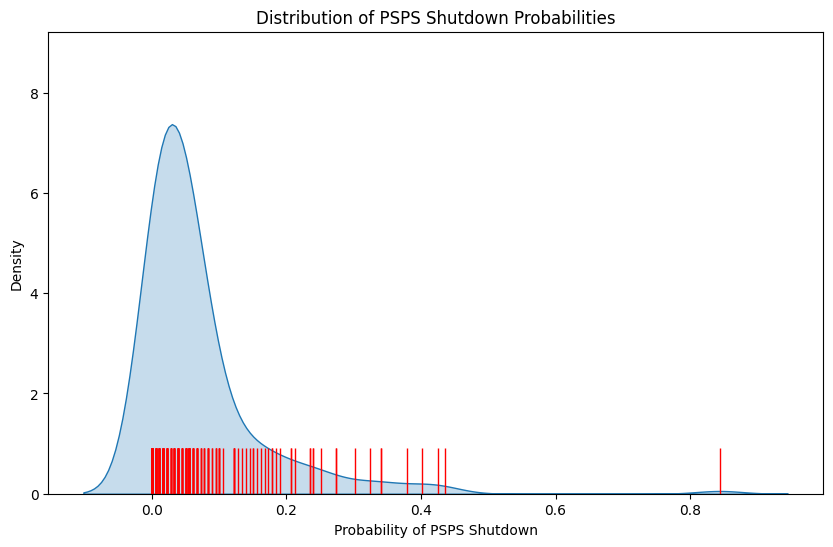

In [72]:
#distribution of weather station psps shutdown percentage
plt.figure(figsize=(10, 6))
sns.kdeplot(data=weather_station_psps_prob_data['percentage_of_PSPS_shutdown'], fill=True)

# Customize the plot
plt.title('Distribution of PSPS Shutdown Probabilities')
plt.xlabel('Probability of PSPS Shutdown')
plt.ylabel('Density')

# Add a rug plot to show the actual data points
sns.rugplot(data=weather_station_psps_prob_data['percentage_of_PSPS_shutdown'], color='red', height=0.1)

plt.show()

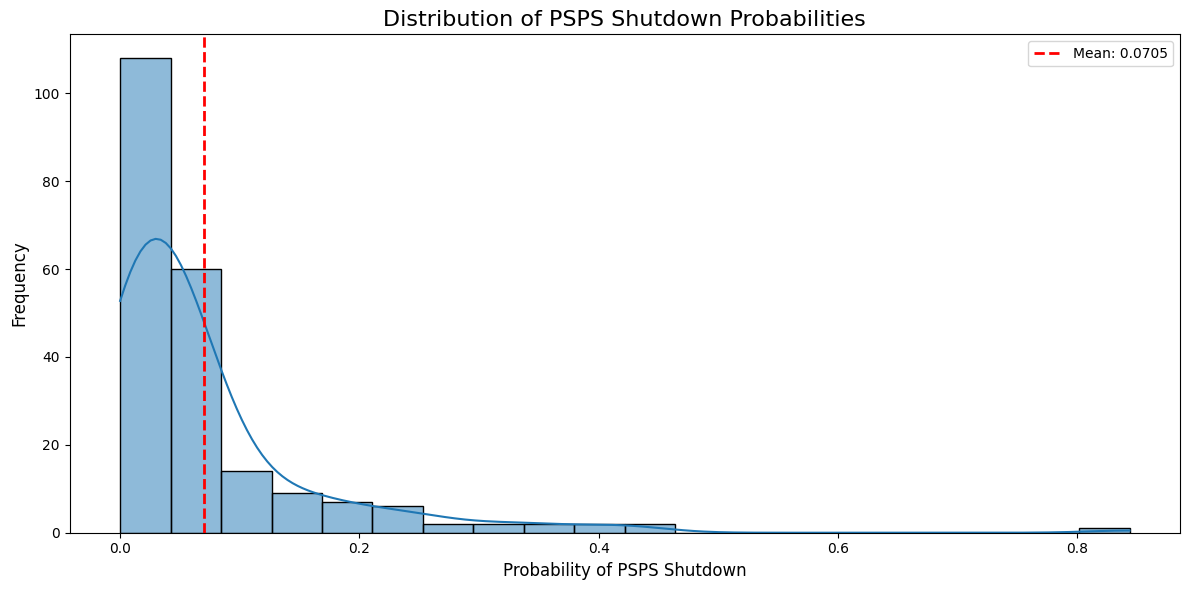

In [73]:
import seaborn as sns
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=weather_station_psps_prob_data, x='percentage_of_PSPS_shutdown', bins=20, kde=True)

# Customize the plot
plt.title('Distribution of PSPS Shutdown Probabilities', fontsize=16)
plt.xlabel('Probability of PSPS Shutdown', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean
mean_probability = weather_station_psps_prob_data['percentage_of_PSPS_shutdown'].mean()
plt.axvline(mean_probability, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_probability:.4f}')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [50]:
test = pd.merge(average_high_fire_days_per_station,weather_station_psps_prob_data, left_on = "station", right_on = "weatherstationcode")
test

,station,Average_Annual_high_fire_days,percentage_of_PSPS_shutdown
0,AMO,15.090909,0.005587
1,ANE,16.272727,0.016760
2,ARH,16.272727,0.050279
3,AVO,16.272727,0.022346
4,AVY,14.500000,0.122905
...,...,...,...
210,WST,12.200000,0.016760
211,WSY,16.000000,0.240223
212,WWY,16.272727,0.100559
213,WYN,16.181818,0.055866


In [51]:
test = test[['station','Average_Annual_high_fire_days','percentage_of_PSPS_shutdown']]
test['Annual_number_of_shutoffs_10years'] = (test['Average_Annual_high_fire_days'] * test['percentage_of_PSPS_shutdown'] * 10)
test

,station,Average_Annual_high_fire_days,percentage_of_PSPS_shutdown,Annual_number_of_shutoffs_10years
0,AMO,15.090909,0.005587,0.843068
1,ANE,16.272727,0.016760,2.727273
2,ARH,16.272727,0.050279,8.181818
3,AVO,16.272727,0.022346,3.636364
4,AVY,14.500000,0.122905,17.821229
...,...,...,...,...
210,WST,12.200000,0.016760,2.044693
211,WSY,16.000000,0.240223,38.435754
212,WWY,16.272727,0.100559,16.363636
213,WYN,16.181818,0.055866,9.040122


In [52]:
shutoff_rates_dict = test.set_index('station')['Annual_number_of_shutoffs_10years'].to_dict()

In [53]:
test2 = joined_gdf_psps_probs.merge(final_df,on = "upstream_span_id", how = "left")

In [54]:
annual_rate_shutoff_dict = test.set_index('station')['Annual_number_of_shutoffs_10years'].to_dict()

In [55]:
annual_rate_shutoff_dict

{'AMO': 0.8430675469781617,
 'ANE': 2.727272727272727,
 'ARH': 8.181818181818182,
 'AVO': 3.6363636363636367,
 'AVY': 17.821229050279328,
 'BFD': 5.4748603351955305,
 'BLC': 13.636363636363635,
 'BLU': 2.0446927374301676,
 'BMR': 1.3631284916201116,
 'BMS': 55.45454545454545,
 'BNA': 4.545454545454545,
 'BOB': 3.3519553072625703,
 'BOC': 61.81818181818181,
 'BRG': 2.727272727272727,
 'BRJ': 8.181818181818182,
 'BRM': 10.0,
 'BUB': 6.703910614525141,
 'BVD': 10.0,
 'BVY': 0.0,
 'CAB': 0.0,
 'CAP': 0.0,
 'CBD': 1.7369222955815133,
 'CCR': 22.727272727272727,
 'CDV': 1.824953445065177,
 'CES': 8.786185881157948,
 'CGD': 0.9090909090909092,
 'CHH': 13.636363636363635,
 'CHO': 0.0,
 'CIR': 0.0,
 'CLM': 12.087353986795328,
 'CLN': 36.56678517013712,
 'CMC': 8.836973082783139,
 'COC': 3.6363636363636367,
 'COH': 0.6815642458100558,
 'COY': 8.181818181818182,
 'CPO': 5.454545454545454,
 'CRI': 0.9090909090909092,
 'CRV': 8.181818181818182,
 'CST': 1.7673946165566279,
 'CTM': 12.513966480446928

In [56]:
def process_weather_station_annual_shutoff_rates(df, shutoff_rates_dict):
    def get_annual_shutoff_rates(station_codes):
        probabilities = [shutoff_rates_dict.get(code, 0) for code in station_codes]
        return probabilities
    
    def calculate_total_shutoffs(shutoffs):
        if not shutoffs:
            return 0
        shutoffs = [x for x in shutoffs if x != 0]
        total_prob = np.sum(shutoffs)
        return total_prob
    
    df['annual_shutoff_counts_10years'] = df['associated_station'].apply(get_annual_shutoff_rates)
    df['total_number_shutoff_10years'] = df['annual_shutoff_counts_10years'].apply(calculate_total_shutoffs)
    
    return df

In [62]:
output.columns.tolist()

['Unnamed: 0',
 'globalid',
 'ohug',
 'feederid',
 'upstreamardfacilityid',
 'is_span',
 'upstream_struct_id',
 'upstream_struct_age',
 'upstream_struct_material',
 'upstream_struct_hftd',
 'upstream_struct_type',
 'upstream_struct_workorderdate',
 'downstream_struct_id',
 'downstream_struct_age',
 'downstream_struct_material',
 'downstream_struct_hftd',
 'downstream_struct_type',
 'downstream_struct_workorderdate',
 'egress_population_max',
 'egress_potential_impact_max',
 'canyon_name',
 'in_coastal_canyons',
 'tribal_land_name',
 'in_tribal_land',
 'work_scope_hardened_date',
 'work_scope_budget_title',
 'work_scope_hardened_year',
 'wrrm_acrper100',
 'wrrm_bldper100',
 'wrrm_popper100',
 'wrrm_fbiper100',
 'wrrm_flper100',
 'wrrm_rosper100',
 'wrrm_desper100',
 'featureclass',
 'parent_feederid',
 'circuit_voltage',
 'seg_upstream_trace',
 'seg_downstream_trace',
 'num_strike_trees',
 'road_intersecting_miles',
 'conductor_age',
 'cond_workorderdate',
 'miles',
 'conductor_level',


In [63]:
output = process_weather_station_annual_shutoff_rates(test2,shutoff_rates_dict)
output['total_number_customers_affected_ten_years'] = output['total_number_shutoff_10years'] * (output['downstream_cust_total'] + output['cust_total'])
output

,Unnamed: 0,globalid,ohug,feederid,upstreamardfacilityid,is_span,upstream_struct_id,upstream_struct_age,upstream_struct_material,upstream_struct_hftd,...,shape_area_vri,shape_vri_vri,shape_srid_vri_vri,snapshot_date_vri_vri,span_id,psps_probability,associated_station,annual_shutoff_counts_10years,total_number_shutoff_10years,total_number_customers_affected_ten_years
0,73262,{EA14BC4C-600C-4F38-AFE9-88A72329CC2B},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},0.470429,"[BVD, CWD]","[10.0, 68.13610970035552]",78.136110,156.272219
1,76939,{C319F3B1-F48B-4B77-BF34-122AF9BC93EF},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},0.470429,"[BVD, CWD]","[10.0, 68.13610970035552]",78.136110,156.272219
2,78565,{CA4D33F8-CE38-446F-B762-22DAA4B1EBA0},OH,445,445-1325F,True,P139135,33.916667,WOOD,2.0,...,7.656659e+07,"MULTIPOLYGON Z (((-116.396314 32.705974 0, -11...",4326.0,2024-03-20,{0000602C-82D9-445A-B1AF-81BDFB0EEC14},0.470429,"[BVD, CWD]","[10.0, 68.13610970035552]",78.136110,156.272219
3,134768,{6FA65E32-76BA-4E08-9AF1-22D909EC3A89},OH,214,214-1122R,True,P615881,16.916667,WOOD,3.0,...,9.575396e+06,"MULTIPOLYGON Z (((-116.937336 33.301243 0, -11...",4326.0,2024-03-20,{0000E23B-31C7-46FE-B72C-C0884849AA13},0.173309,"[CCR, RIN]","[22.727272727272727, 6.363636363636363]",29.090909,116.363636
4,134387,{6FB601D3-4098-4022-B8C3-7FF7D2078F81},OH,230,230-127AE,True,P716539,46.500000,WOOD,2.0,...,5.439639e+07,"MULTIPOLYGON Z (((-117.195128 33.3478 0, -117....",4326.0,2024-03-20,{0001EBFE-A285-4044-AFDD-F4918FA98F7A},0.039106,[FBK],[6.292534281361096],6.292534,6.292534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113261,255581,{4929B833-BE26-4BBA-AD22-06F782788F9C},OH,908,908-2038R,True,P207235,4.666667,STEEL,2.0,...,9.473740e+06,"MULTIPOLYGON Z (((-117.023387 33.267123 0, -11...",4326.0,2024-03-20,{FFFD5791-F5F3-4BF3-9A48-A6A38EAEA49F},0.039106,[VHP],[6.387337057728119],6.387337,114.972067
113262,38690,{F3F505FF-955C-4EF1-938B-4CB4DB5BB9B5},UG,1458,1458-1062F,True,D107268,NaN,CON,NaN,...,7.461022e+06,"MULTIPOLYGON Z (((-116.769396 32.839684 0, -11...",4326.0,2024-03-20,{FFFD763C-C02F-4045-A069-AD177E6B9571},0.112563,"[ANE, TAV, VIC, WAL]","[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450,105.464703
113263,350945,{7878137A-8EDD-4CF8-BA24-7D81C7037291},UG,1458,1458-1062F,True,D107268,NaN,CON,NaN,...,7.461022e+06,"MULTIPOLYGON Z (((-116.769396 32.839684 0, -11...",4326.0,2024-03-20,{FFFD763C-C02F-4045-A069-AD177E6B9571},0.112563,"[ANE, TAV, VIC, WAL]","[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450,35.154901
113264,351351,{9D3210DD-085B-4A5D-9520-B221614690D2},UG,1458,1458-1062F,True,D107268,NaN,CON,NaN,...,7.461022e+06,"MULTIPOLYGON Z (((-116.769396 32.839684 0, -11...",4326.0,2024-03-20,{FFFD763C-C02F-4045-A069-AD177E6B9571},0.112563,"[ANE, TAV, VIC, WAL]","[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450,123.042153


In [79]:
output[['globalid','associated_station','upstream_struct_id','downstream_struct_id','downstream_cust_total','cust_total','annual_shutoff_counts_10years','total_number_shutoff_10years']]

,globalid,associated_station,upstream_struct_id,downstream_struct_id,downstream_cust_total,cust_total,annual_shutoff_counts_10years,total_number_shutoff_10years
0,{EA14BC4C-600C-4F38-AFE9-88A72329CC2B},"[BVD, CWD]",P139135,P108380,2.0,0.0,"[10.0, 68.13610970035552]",78.136110
1,{C319F3B1-F48B-4B77-BF34-122AF9BC93EF},"[BVD, CWD]",P139135,P134688,1.0,1.0,"[10.0, 68.13610970035552]",78.136110
2,{CA4D33F8-CE38-446F-B762-22DAA4B1EBA0},"[BVD, CWD]",P139135,P139090,2.0,0.0,"[10.0, 68.13610970035552]",78.136110
3,{6FA65E32-76BA-4E08-9AF1-22D909EC3A89},"[CCR, RIN]",P615881,P614954,2.0,2.0,"[22.727272727272727, 6.363636363636363]",29.090909
4,{6FB601D3-4098-4022-B8C3-7FF7D2078F81},[FBK],P716539,P201157,1.0,0.0,[6.292534281361096],6.292534
...,...,...,...,...,...,...,...,...
113261,{4929B833-BE26-4BBA-AD22-06F782788F9C},[VHP],P207235,P136255,18.0,0.0,[6.387337057728119],6.387337
113262,{F3F505FF-955C-4EF1-938B-4CB4DB5BB9B5},"[ANE, TAV, VIC, WAL]",D107268,D100101,5.0,1.0,"[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450
113263,{7878137A-8EDD-4CF8-BA24-7D81C7037291},"[ANE, TAV, VIC, WAL]",D107268,D117905,1.0,1.0,"[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450
113264,{9D3210DD-085B-4A5D-9520-B221614690D2},"[ANE, TAV, VIC, WAL]",D107268,D139387,4.0,3.0,"[2.727272727272727, 2.7374301675977653, 5.0837...",17.577450


Text(0, 0.5, 'Number of Customers')

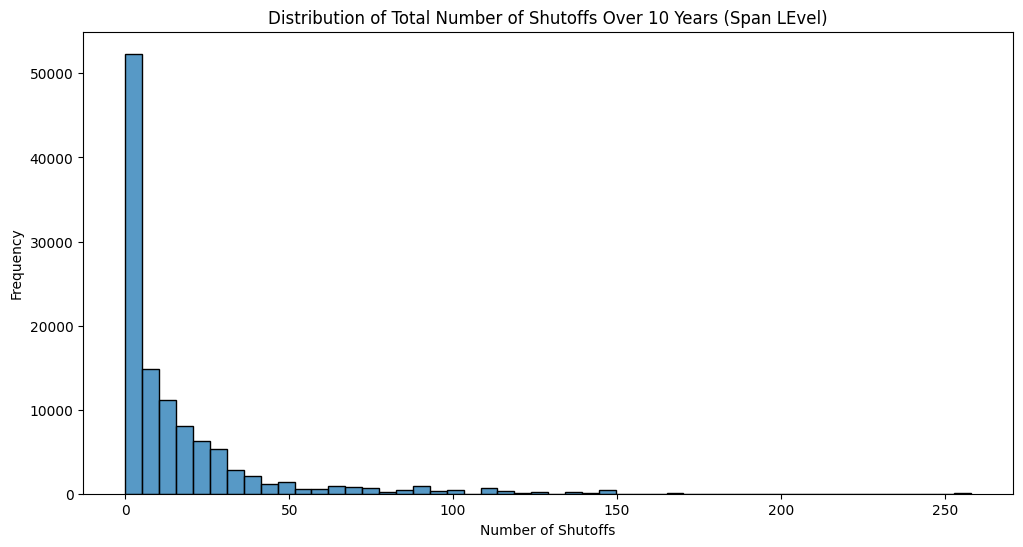

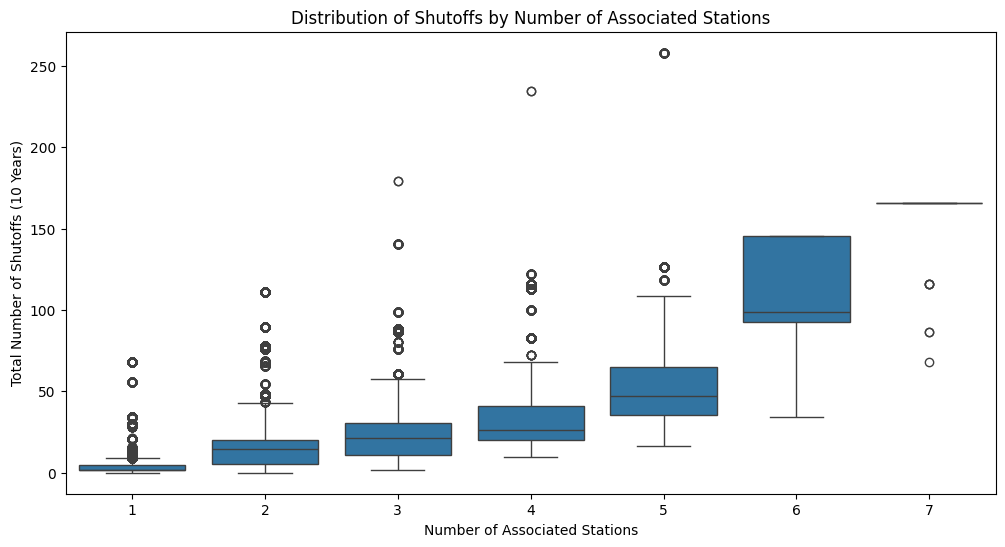

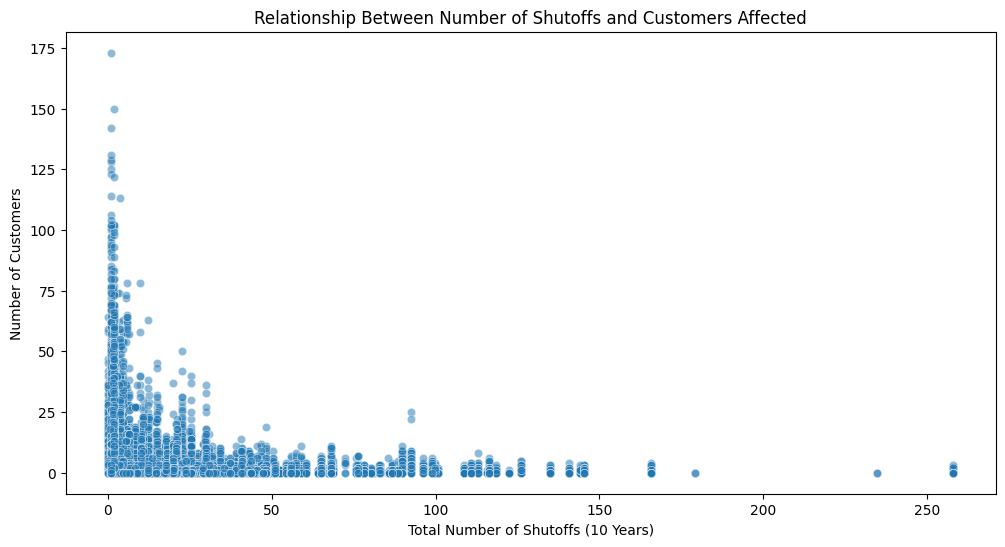

In [81]:
# Create distribution plot of total number of shutoffs
plt.figure(figsize=(12, 6))
sns.histplot(data=output, x='total_number_shutoff_10years', bins=50)
plt.title('Distribution of Total Number of Shutoffs Over 10 Years (Span Level)')
plt.xlabel('Number of Shutoffs')
plt.ylabel('Frequency')

# Create boxplot to show the distribution of shutoffs by number of associated stations
plt.figure(figsize=(12, 6))
output['num_stations'] = output['associated_station'].str.len()
sns.boxplot(x='num_stations', y='total_number_shutoff_10years', data=output)
plt.title('Distribution of Shutoffs by Number of Associated Stations')
plt.xlabel('Number of Associated Stations')
plt.ylabel('Total Number of Shutoffs (10 Years)')

# Create scatter plot of customers affected vs shutoffs
plt.figure(figsize=(12, 6))
sns.scatterplot(data=output, 
                x='total_number_shutoff_10years', 
                y='cust_total',
                alpha=0.5)
plt.title('Relationship Between Number of Shutoffs and Customers Affected')
plt.xlabel('Total Number of Shutoffs (10 Years)')
plt.ylabel('Number of Customers')

# Task 6 Estimate expected customers that'll be shut-off over the next 10 years at the span/segment/circuit granularity
#### segment level = upstreamardfacilityid
#### circuit = parent_feederid
#### span = globalid

# Circuit Level (feederid)

In [96]:
aggregated_feederid_df = output.groupby('feederid', as_index=False).agg(
    total_number_shutoffs_feederid = ('total_number_shutoff_10years','sum'),
    total_customers = ('cust_total','sum'),
    total_downstream_customers = ('downstream_cust_total','sum'),
    total_number_affected_customers_10years = ('total_number_customers_affected_ten_years','sum')
)
aggregated_feederid_df

,feederid,total_number_shutoffs_feederid,total_customers,total_downstream_customers,total_number_affected_customers_10years
0,64.0,335.363128,0.0,0.0,0.000000
1,65.0,180.642458,0.0,0.0,0.000000
2,67.0,46.135094,0.0,0.0,0.000000
3,114.0,217.905028,0.0,0.0,0.000000
4,120.0,47.793296,0.0,0.0,0.000000
...,...,...,...,...,...
358,SHC1,244.906044,792.0,8973.0,16961.046216
359,SL1,18987.111224,222.0,4560.0,441991.346877
360,SSC1,180.639919,482.0,7463.0,13799.847638
361,TM1,785.454545,36.0,621.0,7167.272727


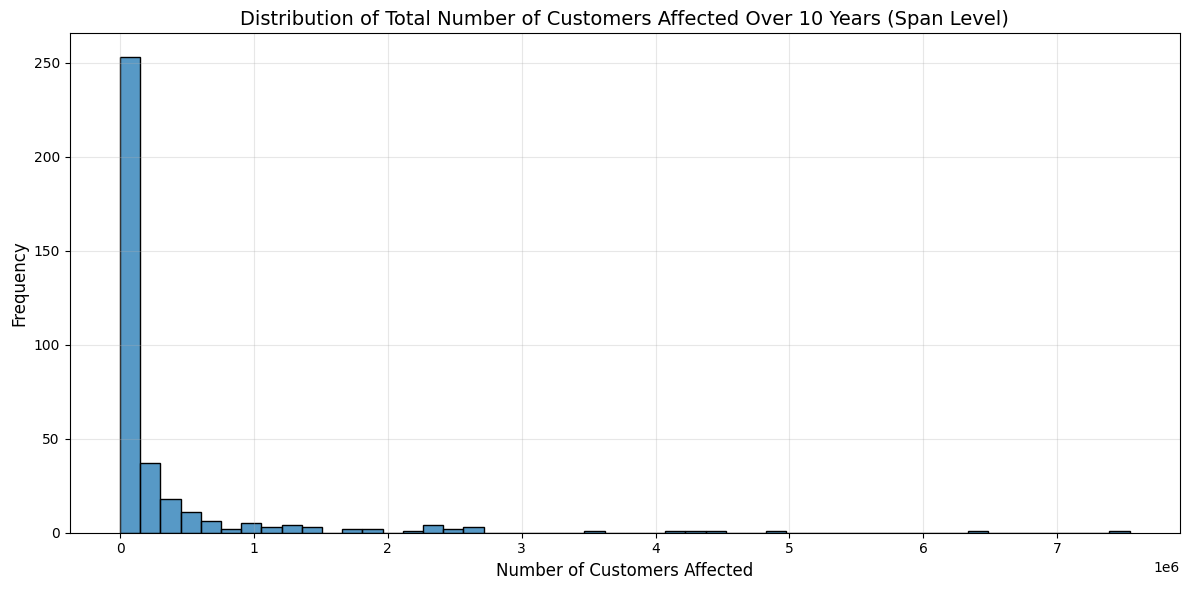

In [98]:
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=aggregated_feederid_df, x='total_number_affected_customers_10years', bins=50)

# Customize the plot
plt.title('Distribution of Total Number of Customers Affected Over 10 Years (Span Level)', fontsize=14)
plt.xlabel('Number of Customers Affected', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Span Level

In [82]:
span_out = output[['globalid','total_number_shutoff_10years','cust_total','downstream_cust_total','total_number_customers_affected_ten_years']]
span_out

,globalid,total_number_shutoff_10years,cust_total,downstream_cust_total,total_number_customers_affected_ten_years
0,{EA14BC4C-600C-4F38-AFE9-88A72329CC2B},78.136110,0.0,2.0,156.272219
1,{C319F3B1-F48B-4B77-BF34-122AF9BC93EF},78.136110,1.0,1.0,156.272219
2,{CA4D33F8-CE38-446F-B762-22DAA4B1EBA0},78.136110,0.0,2.0,156.272219
3,{6FA65E32-76BA-4E08-9AF1-22D909EC3A89},29.090909,2.0,2.0,116.363636
4,{6FB601D3-4098-4022-B8C3-7FF7D2078F81},6.292534,0.0,1.0,6.292534
...,...,...,...,...,...
113261,{4929B833-BE26-4BBA-AD22-06F782788F9C},6.387337,0.0,18.0,114.972067
113262,{F3F505FF-955C-4EF1-938B-4CB4DB5BB9B5},17.577450,1.0,5.0,105.464703
113263,{7878137A-8EDD-4CF8-BA24-7D81C7037291},17.577450,1.0,1.0,35.154901
113264,{9D3210DD-085B-4A5D-9520-B221614690D2},17.577450,3.0,4.0,123.042153


In [92]:
conductor_data[conductor_data['globalid'] == "{E335ABFD-E9B0-497C-A182-837D25ED6FE4}"]['cust_total']

264666    0.0
Name: cust_total, dtype: float64

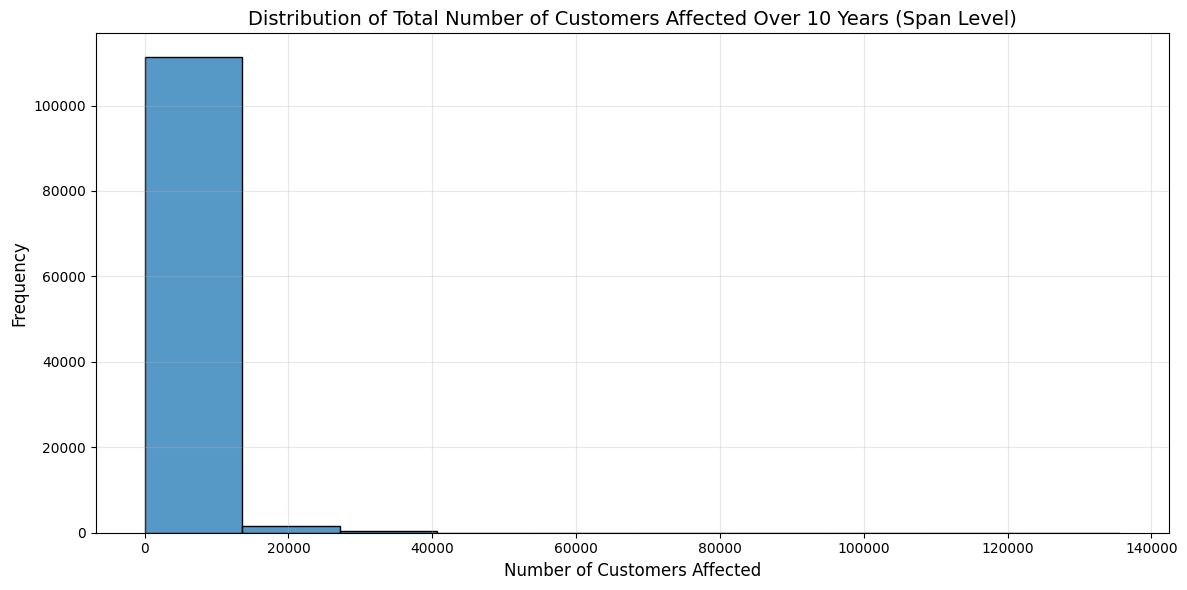

In [102]:


# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=span_out, x='total_number_customers_affected_ten_years', bins=10)

# Customize the plot
plt.title('Distribution of Total Number of Customers Affected Over 10 Years (Span Level)', fontsize=14)
plt.xlabel('Number of Customers Affected', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Segment Level


In [69]:
aggregated_feederid_df = output.groupby('upstreamardfacilityid', as_index=False).agg(
    total_number_shutoffs_feederid = ('total_number_shutoff_10years','sum'),
    total_customers = ('cust_total','sum'),
    total_downstream_customers = ('downstream_cust_total','sum'),
    total_number_affected_customers_10years = ('total_number_customers_affected_ten_years','sum')
)
aggregated_feederid_df

,upstreamardfacilityid,total_number_shutoffs_feederid,total_customers,total_downstream_customers,total_number_affected_customers_10years
0,1001-1130R,884.367699,167.0,21211.0,82613.247334
1,1001-1140R,533.076689,100.0,17720.0,68836.424581
2,1001-1231F,3.862875,0.0,5.0,19.314373
3,1001-1232F,19.314373,0.0,3508.0,13550.963941
4,1001-1814AE,50.217369,5.0,43.0,185.417979
...,...,...,...,...,...
1000,DV1-3R,5809.626714,170.0,5044.0,166436.229050
1001,RA1-402R,2070.594210,85.0,1243.0,30552.767902
1002,RB1-427R,7132.849162,226.0,6635.0,146697.866938
1003,RB1-433R,3767.804977,45.0,1100.0,29611.085322
